# **Data Information Quality Project**


*  ID Project:  3
*  ID Person:   10104067
*  Dataset:     1







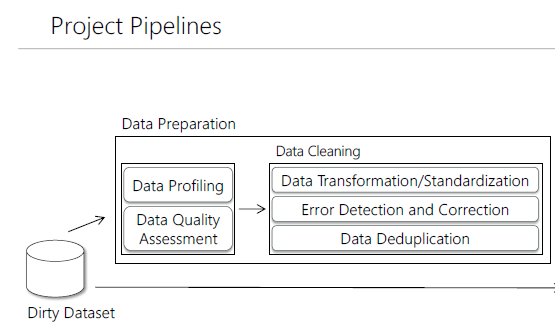

**1. Data Exploration and Data Quality Assessment**

Import libraries:

In [4]:
import pandas as pd
import numpy as np

Import data:

In [5]:
MOVIES = pd.read_csv("https://raw.githubusercontent.com/lukamath/DIQ_Project/master/movies.csv")
MOVIES

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


Basic operation to inspect data:

In [6]:
#records and columns
MOVIES.shape

(9999, 9)

In [7]:
#Schema of the data source
MOVIES.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross'],
      dtype='object')

In [8]:
MOVIES.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object

VOTES and Gross are not numeric type. I am going to convert them later.


In [9]:
#number of not null values for each column
MOVIES.count()

MOVIES      9999
YEAR        9355
GENRE       9919
RATING      8179
ONE-LINE    9999
STARS       9999
VOTES       8179
RunTime     7041
Gross        460
dtype: int64

The columns MOVIES, STARS and ONE-LINE have no null values as they have 9999 values equal to the number of rows of dataset, but they can have null equivalent content like \n or others.


**Completeness**
(before any change on original dataset)

In [10]:
#total number of not null values
NOT_NULL = MOVIES.count().sum()
MOVIES.count().sum()

np.int64(73130)

In [11]:
#total number of null values
NULL = MOVIES.isnull().sum().sum()
MOVIES.isnull().sum().sum()

np.int64(16861)

In [12]:
TOT = NOT_NULL + NULL
TOT

np.int64(89991)

In [13]:
COMPLETENESS = NOT_NULL / TOT
print(COMPLETENESS)

0.8126368192374793


In [14]:
#Function to extract all unique genres from the 'GENRE' column
def extract_unique_genres(df):
    # Split genres by commas and strip spaces, then flatten the list and find unique values
    genres = MOVIES['GENRE'].str.split(',').explode().str.strip().unique()
    return genres
# Extract all unique genres
unique_genres = extract_unique_genres(MOVIES)
unique_genres

array(['Action', 'Horror', 'Thriller', 'Animation', 'Adventure', 'Drama',
       'Comedy', 'Crime', 'Romance', 'Mystery', 'Fantasy', 'History',
       'Sci-Fi', 'Biography', 'Family', 'Documentary', 'Music', 'Sport',
       'Short', 'Game-Show', 'Reality-TV', 'Musical', 'War', 'Western',
       'Film-Noir', nan, 'Talk-Show', 'News'], dtype=object)

There are not mispelled genres. 

**Accuracy**

I can calculate accuracy for the attribute "genre" checking if there are mispelling

In [15]:
# Function to check for repeated values in the 'GENRE' column
def check_repeated_genres(row):
    # Handle NaN values in the 'GENRE' column
    if pd.isna(row):
        return []
    
    # Split the genres and strip any leading/trailing spaces
    genres = [genre.strip() for genre in row.split(',')]  
    
    # Find duplicate genres in the list
    duplicates = [genre for genre in genres if genres.count(genre) > 1]
    
    # Return the unique duplicates
    return list(set(duplicates))


# Apply the function to the 'GENRE' column
MOVIES['Repeated Genres'] = MOVIES['GENRE'].apply(check_repeated_genres)

# Filter records with repeated genres
repeated_genres_records = MOVIES[MOVIES['Repeated Genres'].apply(len) > 0]

# Display the records with repeated genres
print(repeated_genres_records)

Empty DataFrame
Columns: [MOVIES, YEAR, GENRE, RATING, ONE-LINE, STARS, VOTES, RunTime, Gross, Repeated Genres]
Index: []


The Accuracy for "GENRE" is 100%: there are not mispelled or duplicated genre for each records

**Consistency**

I check consistency with the rule: if there some votes the valuation can not be null and viceversa

In [16]:
#Rule: if votes is not Null then rate must be not null and viceversa
#we add the column consistency
#we assign the value 1 if the rule is satisfied, 0 otherwise

# Create a new column that checks the condition
MOVIES['consistency_rating'] = MOVIES.apply(
    lambda row: 1 if ((pd.notna(row['RATING']) and pd.notna(row['VOTES'])) or 
                      (pd.isna(row['RATING']) and pd.isna(row['VOTES']))) 
               else 0, axis=1)

# Count how many records have a consistency_rating of 0
CONSISTENT = MOVIES['consistency_rating']== 0
CONSISTENT = CONSISTENT.sum()
# Print the result
print(f"Number of records with 0 in 'consistency_rating': {CONSISTENT}")


Number of records with 0 in 'consistency_rating': 0


All records are consistent on the rule Votes --> Rating

**2. Data Profiling**


_Uniqueness_ and _Distinctness_ of movies' titles in the original dataset

In [17]:
#Total rows
rows=MOVIES.shape[0]
rows

9999

In [18]:
#not null titles of movie
count_movies=MOVIES['MOVIES'].count()
count_movies

np.int64(9999)

In [19]:
#Distinct title before anyoperaton in the original dataset
distinct_movies=MOVIES['MOVIES'].nunique()
distinct_movies

6817

_Uniqueness = Distinct / Row_

In [20]:
uniqueness_movies=distinct_movies/rows
print(f"Uniqueness for 'Movies': {uniqueness_movies}")

Uniqueness for 'Movies': 0.6817681768176818


_Distinctness = Distinct / Count_

In [21]:
distinctness_movies=distinct_movies/count_movies
print(f"Distinctness for 'Movies': {distinctness_movies}")

Distinctness for 'Movies': 0.6817681768176818


**3. Wrangling**

In [22]:
MOVIES.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MOVIES              9999 non-null   object 
 1   YEAR                9355 non-null   object 
 2   GENRE               9919 non-null   object 
 3   RATING              8179 non-null   float64
 4   ONE-LINE            9999 non-null   object 
 5   STARS               9999 non-null   object 
 6   VOTES               8179 non-null   object 
 7   RunTime             7041 non-null   float64
 8   Gross               460 non-null    object 
 9   Repeated Genres     9999 non-null   object 
 10  consistency_rating  9999 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 859.4+ KB


In [23]:
MOVIES = MOVIES.drop(columns=['consistency_rating','Repeated Genres'])

In [24]:
MOVIES.YEAR.value_counts()

YEAR
(2020– )             892
(2021– )             658
(2020)               639
(2019– )             549
(2019)               544
                    ... 
(III) (2011)           1
(VI) (2016)            1
(2001 TV Movie)        1
(1985– )               1
(2003 TV Special)      1
Name: count, Length: 438, dtype: int64

In [25]:
# import pandas as pd
# import numpy as np
# MOVIES = pd.read_csv("https://raw.githubusercontent.com/lukamath/DIQ_Project/master/movies.csv")

In [26]:
MOVIES['YEAR']=MOVIES['YEAR'].str.replace(r'[()]', '', regex=True)

In [27]:
MOVIES.YEAR.value_counts()

YEAR
2020–              892
2021–              658
2020               639
2019–              549
2019               544
                  ... 
III 2011             1
VI 2016              1
2001 TV Movie        1
1985–                1
2003 TV Special      1
Name: count, Length: 438, dtype: int64

In [28]:
# def safe_split(x):
#     if pd.isna(x) or '–' not in str(x):
#         return [x, None]
#     return x.split('–', 1)

# MOVIES[['Year1','Last Year']] = MOVIES['YEAR'].apply(safe_split).apply(pd.Series)

#Add two columns generated from the split function
MOVIES[['Year','Last Year']]=MOVIES.YEAR.str.split('–', n=1, expand=True)
MOVIES

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Year,Last Year
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,2021,None
1,Masters of the Universe: Revelation,2021–,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,2021,
2,The Walking Dead,2010–2022,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,2010,2022
3,Rick and Morty,2013–,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,2013,
4,Army of Thieves,2021,"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,2021,None
...,...,...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,2021–,"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN,2021,
9995,Arcane,2021–,"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN,2021,
9996,Heart of Invictus,2022–,"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN,2022,
9997,The Imperfects,2021–,"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN,2021,


In [29]:
MOVIES['Last Year'] = MOVIES['Last Year'].replace([' ',None, np.nan], 0)
# MOVIES['Last Year'] = MOVIES['Last Year'].fillna('0')
MOVIES

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Year,Last Year
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,2021,0
1,Masters of the Universe: Revelation,2021–,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,2021,0
2,The Walking Dead,2010–2022,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,2010,2022
3,Rick and Morty,2013–,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,2013,0
4,Army of Thieves,2021,"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,2021,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,2021–,"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN,2021,0
9995,Arcane,2021–,"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN,2021,0
9996,Heart of Invictus,2022–,"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN,2022,0
9997,The Imperfects,2021–,"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN,2021,0


In [30]:
# I check to not have more null in Last Year
MOVIES['Last Year'].isnull().sum()

np.int64(0)

In [31]:
# non_numeric_year = MOVIES['YEAR'].str.contains(r'[^0-9-]|[^0-9\-0-9]', na=False).sum()
# listA=MOVIES['Year'].str.contains(r'[^0-9-]|[^0-9\-0-9]', na=False)
# listA.head()

# Check for rows where Year contains alphabetic characters
contains_letters = MOVIES[MOVIES['Year'].str.contains(r'[a-zA-Z]', na=False)]
contains_letters['Year']
# print(contains_letters)

36               I 2018
84              II 2007
125              I 2019
155     2021 TV Special
161              I 2017
             ...       
9651                III
9652                III
9653                III
9654                III
9655                III
Name: Year, Length: 1048, dtype: object

In [32]:
#just a check on a record
record = MOVIES.iloc[9651]
print(record)


MOVIES                                              True Story
YEAR                                                       III
GENRE                              \nComedy, Drama            
RATING                                                     NaN
ONE-LINE                                        \nAdd a Plot\n
STARS        \n    Director:\nStephen Williams\n| \n    Sta...
VOTES                                                      NaN
RunTime                                                    NaN
Gross                                                      NaN
Year                                                       III
Last Year                                                    0
Name: 9651, dtype: object


In [33]:
#just a test with last records
records = MOVIES.iloc[9648:9999] 
print(records['Year'])

9648    2009
9649     III
9650     III
9651     III
9652     III
        ... 
9994    2021
9995    2021
9996    2022
9997    2021
9998    2021
Name: Year, Length: 351, dtype: object


In [34]:
# Filter rows where 'Year' contains only non-numeric characters
non_numeric_years = MOVIES[MOVIES['Year'].str.match(r'^[^0-9]+$', na=False)]

print(non_numeric_years['MOVIES'])
# print(non_numeric_years)
print(non_numeric_years['Year'])

1155           The Killer
1165               Hustle
1527            Wednesday
1645            Strangers
1684    The Pale Blue Eye
              ...        
9651           True Story
9652           True Story
9653           True Story
9654           True Story
9655           True Story
Name: MOVIES, Length: 104, dtype: object
1155      I
1165    III
1527     II
1645    XII
1684     II
       ... 
9651    III
9652    III
9653    III
9654    III
9655    III
Name: Year, Length: 104, dtype: object


In [35]:
!pip install missingno

<Axes: >

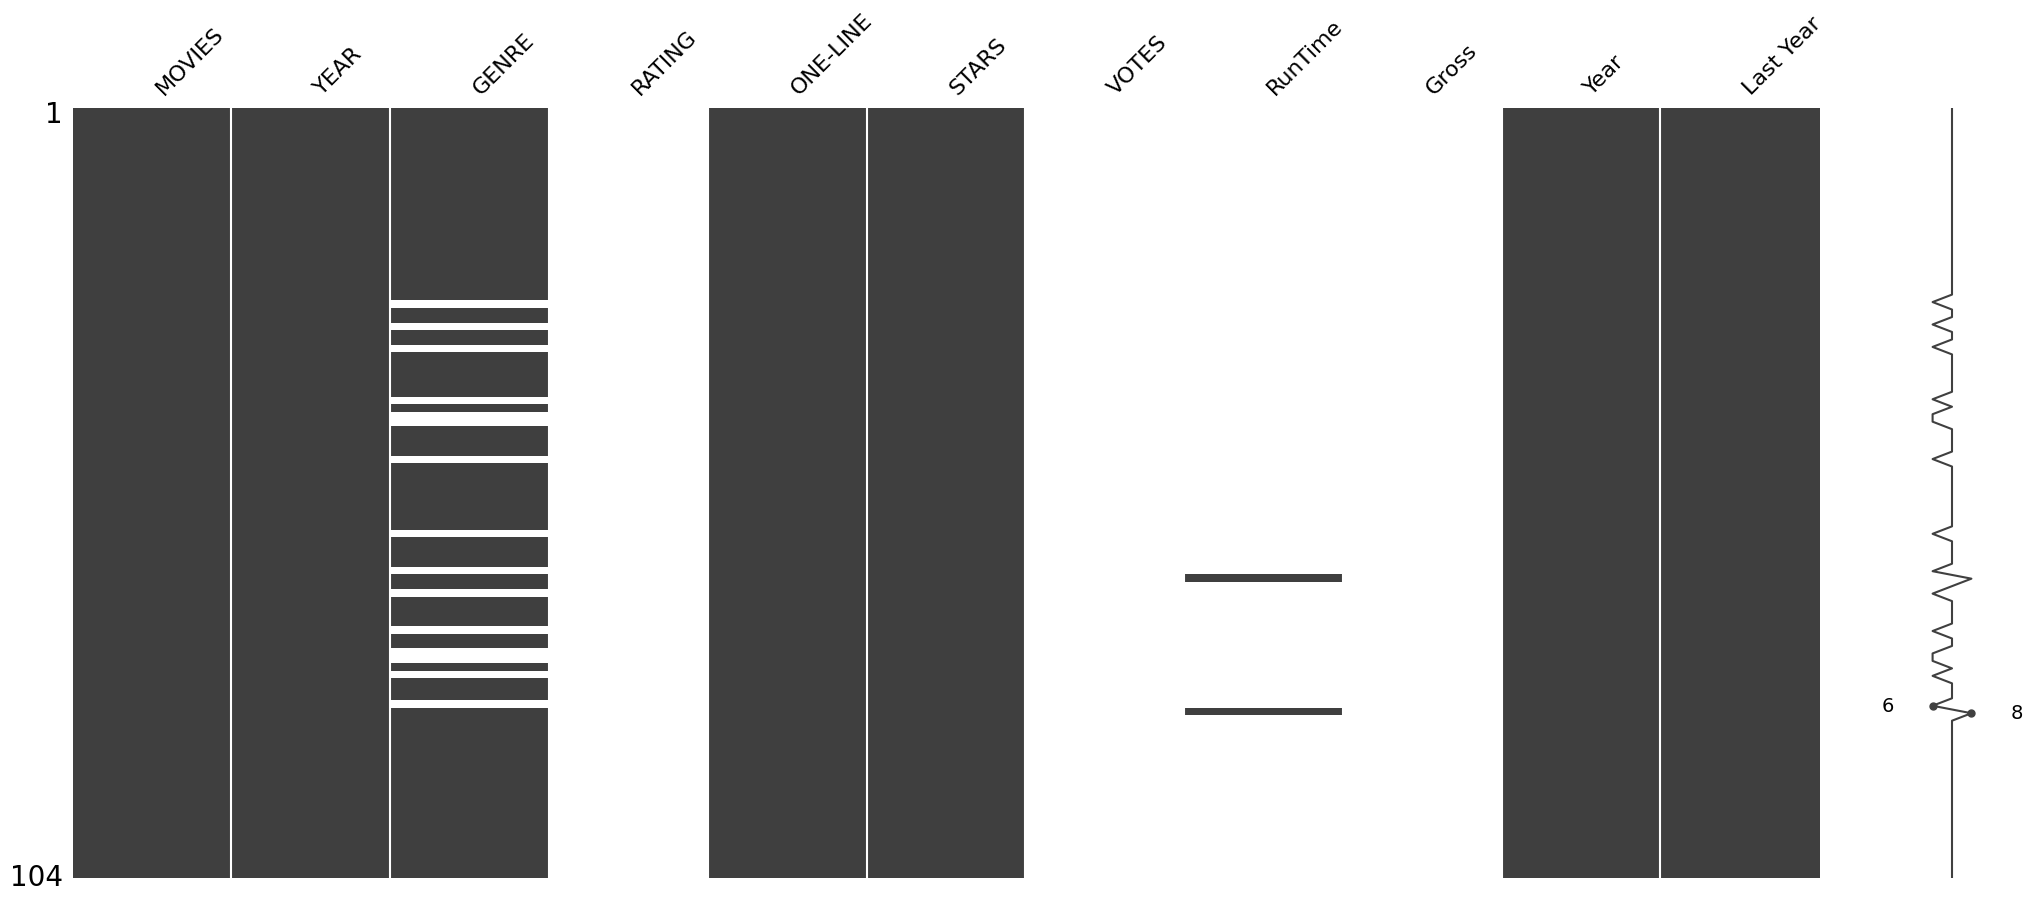

In [36]:
#Check presence of null in non_numeric_years to decide if to drop or not
import missingno as msno
msno.matrix(non_numeric_years)

In [37]:
# Filter rows where 'Year' contains both numbers and letters
mixed_years = MOVIES[MOVIES['Year'].str.contains(r'(?=.*\d)(?=.*[a-zA-Z])', na=False)]
print(mixed_years['Year'])

36               I 2018
84              II 2007
125              I 2019
155     2021 TV Special
161              I 2017
             ...       
6458    2017 TV Special
6461      2020 TV Movie
6462         2021 Video
6468    2016 TV Special
6473    2018 Video Game
Name: Year, Length: 944, dtype: object


<Axes: >

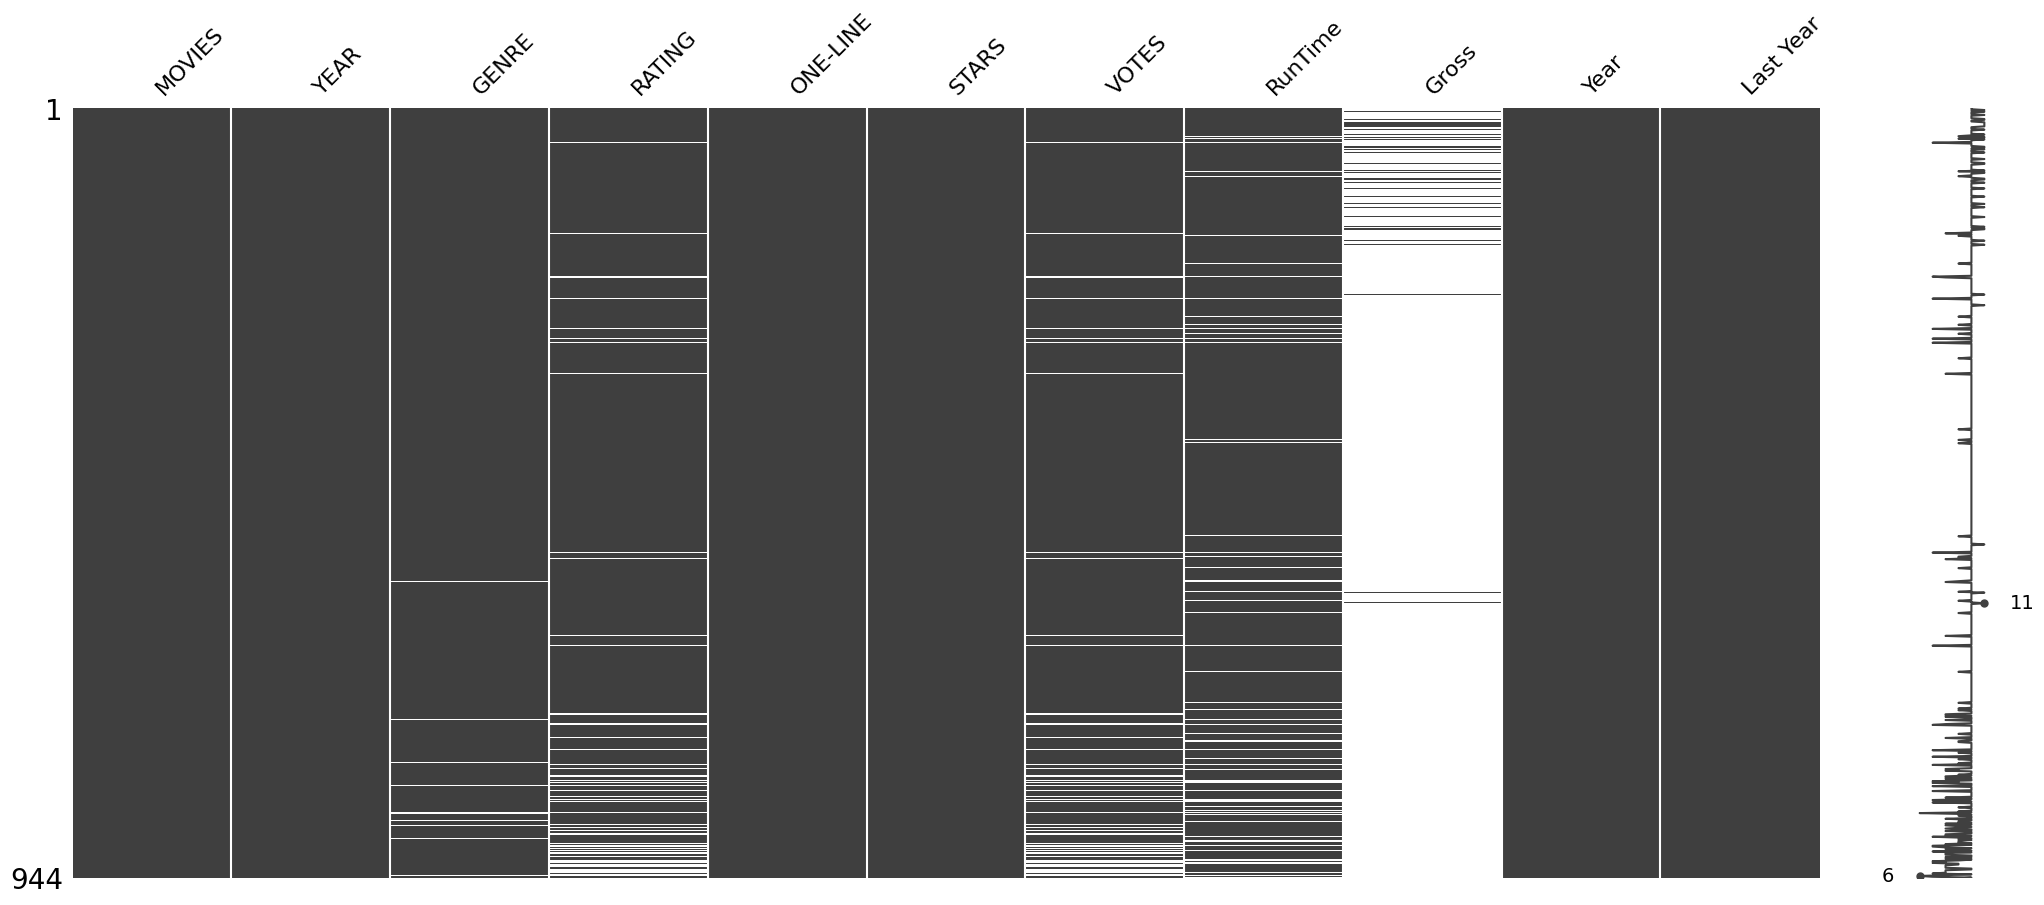

In [38]:
msno.matrix(mixed_years)

In [39]:
# Step 2: Extract only digits from the 'Year' attribute for filtered rows
# MOVIES.loc[mixed_years, 'Year'] = MOVIES.loc[mixed_years, 'Year'].str.extract(r'(\d+)', expand=False)
MOVIES['Year_digits'] = MOVIES['Year'].str.extract('(\d+)', expand=False)
MOVIES

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Year,Last Year,Year_digits
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,2021,0,2021
1,Masters of the Universe: Revelation,2021–,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,2021,0,2021
2,The Walking Dead,2010–2022,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,2010,2022,2010
3,Rick and Morty,2013–,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,2013,0,2013
4,Army of Thieves,2021,"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,2021,0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,2021–,"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN,2021,0,2021
9995,Arcane,2021–,"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN,2021,0,2021
9996,Heart of Invictus,2022–,"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN,2022,0,2022
9997,The Imperfects,2021–,"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN,2021,0,2021


* Splitting Stars 

Stars --> Director | Stars

In [40]:
#Remove all \n
MOVIES = MOVIES.replace({'\n': ''}, regex=True)

In [41]:
#Function to split Stars

def custom_split(x):
    x = str(x).strip()  # Clean the string
    
    if '|' in x:
        return x.split('|', 1)
    elif 'Stars:' in x:
        return x.split('Stars:', 1)
    else:
        return [x, None]

In [42]:
MOVIES[['Director', 'All Stars']] = pd.DataFrame(MOVIES['STARS'].apply(custom_split).tolist())
MOVIES

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Year,Last Year,Year_digits,Director,All Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0,NaN,2021,0,2021,Director:Peter Thorwarth,"Stars:Peri Baumeister, Carl Anton Koch, A..."
1,Masters of the Universe: Revelation,2021–,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0,NaN,2021,0,2021,,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0,NaN,2010,2022,2010,,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013–,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0,NaN,2013,0,2013,,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,NaN,NaN,NaN,2021,0,2021,Director:Matthias Schweighöfer,"Stars:Matthias Schweighöfer, Nathalie Emm..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,2021–,"Adventure, Drama, Fantasy",NaN,Add a Plot,"Stars:Morgan Taylor Campbell, ...",NaN,NaN,NaN,2021,0,2021,,"Morgan Taylor Campbell, Chris Cope, Iñaki Godo..."
9995,Arcane,2021–,"Animation, Action, Adventure",NaN,Add a Plot,,NaN,NaN,NaN,2021,0,2021,,None
9996,Heart of Invictus,2022–,"Documentary, Sport",NaN,Add a Plot,Director:Orlando von Einsiedel| Star:P...,NaN,NaN,NaN,2022,0,2022,Director:Orlando von Einsiedel,Star:Prince Harry
9997,The Imperfects,2021–,"Adventure, Drama, Fantasy",NaN,Add a Plot,Director:Jovanka Vuckovic| Stars:Morga...,NaN,NaN,NaN,2021,0,2021,Director:Jovanka Vuckovic,"Stars:Morgan Taylor Campbell, Iñaki Godoy..."


In [43]:
# Remove "Director:" from Director column
MOVIES['Director'] = MOVIES['Director'].str.replace('Director:', '').str.strip()

# Remove "Stars:" from Stars column
MOVIES['All Stars'] = MOVIES['All Stars'].str.replace('Stars:', '').str.replace('Star:', '').str.strip()

#MOVIES.drop('STARS', axis=1)
MOVIES

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Year,Last Year,Year_digits,Director,All Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0,NaN,2021,0,2021,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021–,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0,NaN,2021,0,2021,,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0,NaN,2010,2022,2010,,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013–,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0,NaN,2013,0,2013,,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,NaN,NaN,NaN,2021,0,2021,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,2021–,"Adventure, Drama, Fantasy",NaN,Add a Plot,"Stars:Morgan Taylor Campbell, ...",NaN,NaN,NaN,2021,0,2021,,"Morgan Taylor Campbell, Chris Cope, Iñaki Godo..."
9995,Arcane,2021–,"Animation, Action, Adventure",NaN,Add a Plot,,NaN,NaN,NaN,2021,0,2021,,None
9996,Heart of Invictus,2022–,"Documentary, Sport",NaN,Add a Plot,Director:Orlando von Einsiedel| Star:P...,NaN,NaN,NaN,2022,0,2022,Orlando von Einsiedel,Prince Harry
9997,The Imperfects,2021–,"Adventure, Drama, Fantasy",NaN,Add a Plot,Director:Jovanka Vuckovic| Stars:Morga...,NaN,NaN,NaN,2021,0,2021,Jovanka Vuckovic,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J..."


<Axes: >

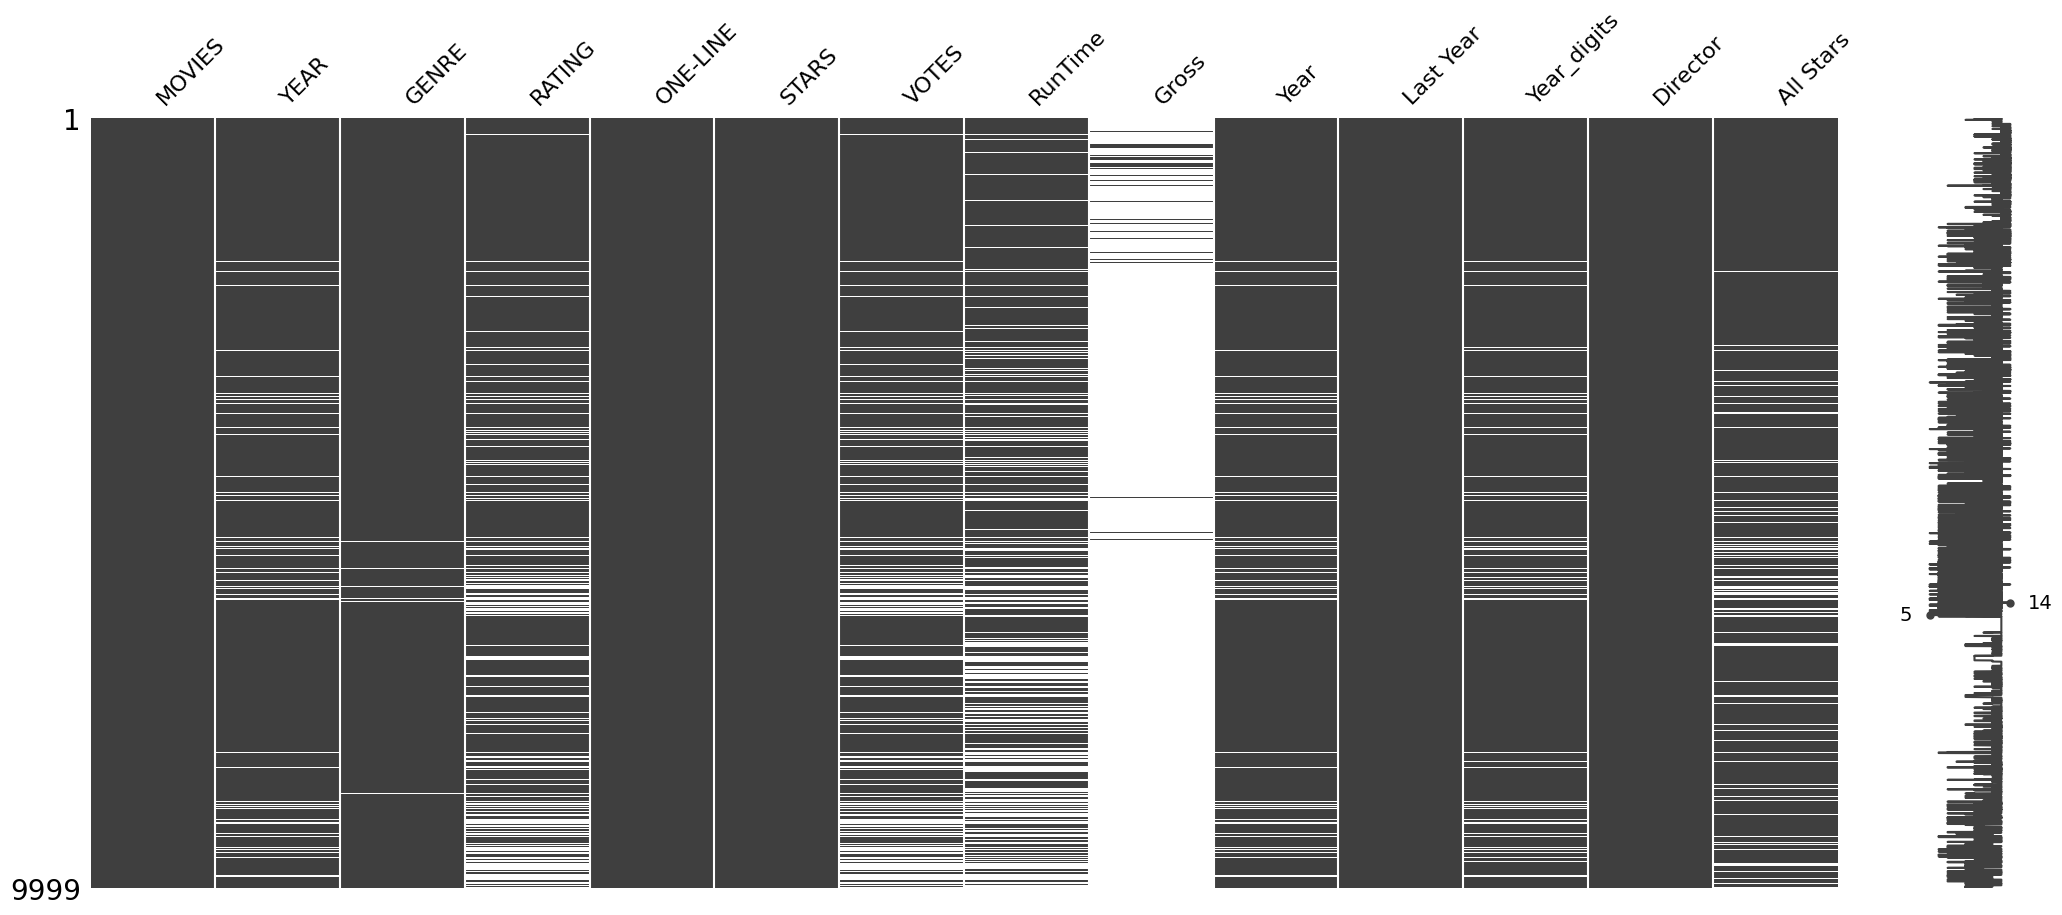

In [44]:
msno.matrix(MOVIES)

In [45]:
# MOVIES['Director'].isna().sum()
print("Empty strings:", (MOVIES['Director'] == '').sum())

Empty strings: 3443


In [46]:
MOVIES['Director']=MOVIES['Director'].fillna('-').replace('', '-')

In [47]:
#all empty value for DIrector are now populated as "-"
print("Empty strings:", (MOVIES['Director'] == '-').sum())

Empty strings: 3443


In [48]:
MOVIES.head(50)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Year,Last Year,Year_digits,Director,All Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0,NaN,2021,0,2021,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021–,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0,NaN,2021,0,2021,-,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0,NaN,2010,2022,2010,-,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013–,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0,NaN,2013,0,2013,-,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,NaN,NaN,NaN,2021,0,2021,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."
5,Outer Banks,2020–,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cl...","25,858",50.0,NaN,2020,0,2020,-,"Chase Stokes, Madelyn Cline, Madison Bailey, J..."
6,The Last Letter from Your Lover,2021,"Drama, Romance",6.8,A pair of interwoven stories set in the past a...,Director:Augustine Frizzell| Stars:Sha...,"5,283",110.0,NaN,2021,0,2021,Augustine Frizzell,"Shailene Woodley, Joe Alwyn, Wendy Nottingham,..."
7,Dexter,2006–2013,"Crime, Drama, Mystery",8.6,"By day, mild-mannered Dexter is a blood-spatte...","Stars:Michael C. Hall, Jennife...","665,387",53.0,NaN,2006,2013,2006,-,"Michael C. Hall, Jennifer Carpenter, David Zay..."
8,Never Have I Ever,2020–,Comedy,7.9,The complicated life of a modern-day first gen...,"Stars:Maitreyi Ramakrishnan, P...","34,530",30.0,NaN,2020,0,2020,-,"Maitreyi Ramakrishnan, Poorna Jagannathan, Dar..."
9,Virgin River,2019–,"Drama, Romance",7.4,"Seeking a fresh start, nurse practitioner Meli...","Stars:Alexandra Breckenridge, ...","27,279",44.0,NaN,2019,0,2019,-,"Alexandra Breckenridge, Martin Henderson, Coli..."


In [49]:
print("None strings:", (MOVIES['All Stars'].isna()).sum())
print("None strings:", (MOVIES['All Stars']=='').sum())

None strings: 996
None strings: 0


In [50]:
MOVIES['All Stars'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
9994    False
9995     True
9996    False
9997    False
9998    False
Name: All Stars, Length: 9999, dtype: bool

In [51]:
MOVIES[MOVIES['All Stars'].isna()]

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Year,Last Year,Year_digits,Director,All Stars
24,He-Man and the Masters of the Universe,2021–,"Animation, Action, Adventure",NaN,Eternia's Prince Adam discovers the power of G...,,NaN,NaN,NaN,2021,0,2021,-,None
235,Sexy Beasts,2021–,"Reality-TV, Romance",4.7,"Hoping to say goodbye to superficial dating, r...",Star:Rob Delaney,592,NaN,NaN,2021,0,2021,Star:Rob Delaney,None
1027,Myth & Mogul: John DeLorean,2021–,"Documentary, Biography, Crime",7.0,"In the automotive world, John DeLorean rose fr...",,213,NaN,NaN,2021,0,2021,-,None
1184,Our Planet,2019,Documentary,9.3,Documentary series focusing on the breadth of ...,Star:David Attenborough,"36,473",403.0,NaN,2019,0,2019,Star:David Attenborough,None
1367,El caso Wanninkhof-Carabantes,2021,"Documentary, Crime, History",6.5,"In 1999, teen Rocío Wanninkhof is murdered. He...",Director:Tània Balló,"1,357",88.0,NaN,2021,0,2021,Tània Balló,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1899,2022–,"Drama, History, Horror",NaN,Add a Plot,Director:Baran bo Odar,NaN,NaN,NaN,2022,0,2022,Baran bo Odar,None
9990,1899,2022–,"Drama, History, Horror",NaN,Add a Plot,Director:Baran bo Odar,NaN,NaN,NaN,2022,0,2022,Baran bo Odar,None
9991,1899,2022–,"Drama, History, Horror",NaN,Add a Plot,Director:Baran bo Odar,NaN,NaN,NaN,2022,0,2022,Baran bo Odar,None
9992,1899,2022–,"Drama, History, Horror",NaN,Add a Plot,Director:Baran bo Odar,NaN,NaN,NaN,2022,0,2022,Baran bo Odar,None


In [52]:
#replace empty or None under Stars as '-' as for director
MOVIES['All Stars']=MOVIES['All Stars'].fillna('-').replace('', '-')

In [53]:
MOVIES[MOVIES['All Stars']=='-']

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Year,Last Year,Year_digits,Director,All Stars
24,He-Man and the Masters of the Universe,2021–,"Animation, Action, Adventure",NaN,Eternia's Prince Adam discovers the power of G...,,NaN,NaN,NaN,2021,0,2021,-,-
235,Sexy Beasts,2021–,"Reality-TV, Romance",4.7,"Hoping to say goodbye to superficial dating, r...",Star:Rob Delaney,592,NaN,NaN,2021,0,2021,Star:Rob Delaney,-
1027,Myth & Mogul: John DeLorean,2021–,"Documentary, Biography, Crime",7.0,"In the automotive world, John DeLorean rose fr...",,213,NaN,NaN,2021,0,2021,-,-
1184,Our Planet,2019,Documentary,9.3,Documentary series focusing on the breadth of ...,Star:David Attenborough,"36,473",403.0,NaN,2019,0,2019,Star:David Attenborough,-
1367,El caso Wanninkhof-Carabantes,2021,"Documentary, Crime, History",6.5,"In 1999, teen Rocío Wanninkhof is murdered. He...",Director:Tània Balló,"1,357",88.0,NaN,2021,0,2021,Tània Balló,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1899,2022–,"Drama, History, Horror",NaN,Add a Plot,Director:Baran bo Odar,NaN,NaN,NaN,2022,0,2022,Baran bo Odar,-
9990,1899,2022–,"Drama, History, Horror",NaN,Add a Plot,Director:Baran bo Odar,NaN,NaN,NaN,2022,0,2022,Baran bo Odar,-
9991,1899,2022–,"Drama, History, Horror",NaN,Add a Plot,Director:Baran bo Odar,NaN,NaN,NaN,2022,0,2022,Baran bo Odar,-
9992,1899,2022–,"Drama, History, Horror",NaN,Add a Plot,Director:Baran bo Odar,NaN,NaN,NaN,2022,0,2022,Baran bo Odar,-


* Formatting

In [54]:
MOVIES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MOVIES       9999 non-null   object 
 1   YEAR         9355 non-null   object 
 2   GENRE        9919 non-null   object 
 3   RATING       8179 non-null   float64
 4   ONE-LINE     9999 non-null   object 
 5   STARS        9999 non-null   object 
 6   VOTES        8179 non-null   object 
 7   RunTime      7041 non-null   float64
 8   Gross        460 non-null    object 
 9   Year         9355 non-null   object 
 10  Last Year    9999 non-null   object 
 11  Year_digits  9251 non-null   object 
 12  Director     9999 non-null   object 
 13  All Stars    9999 non-null   object 
dtypes: float64(2), object(12)
memory usage: 1.1+ MB


In [55]:
MOVIES = MOVIES.drop(columns=['YEAR','Year'])

In [56]:
# Convert VOTES to numeric format
MOVIES['VOTES'] = MOVIES['VOTES'].str.replace(',', '', regex=True)
# MOVIES['VOTES'] = pd.to_numeric(MOVIES['VOTES'], errors='coerce')  # Convert to numeric (keeps NaN)
MOVIES['VOTES'] = pd.to_numeric(MOVIES['VOTES'], errors='coerce').fillna(0).astype(int) #Convert to numeric filling 0 where NaN

In [57]:
#1) control the string format of gross 
# MOVIES[MOVIES['Gross'].notnull() & MOVIES['Gross'].str.startswith('$')]
MOVIES[MOVIES['Gross'].notnull()]

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Last Year,Year_digits,Director,All Stars
77,The Hitman's Bodyguard,"Action, Comedy, Crime",6.9,"The world's top bodyguard gets a new client, a...",Director:Patrick Hughes| Stars:Ryan Re...,205979,118.0,$75.47M,0,2017,Patrick Hughes,"Ryan Reynolds, Samuel L. Jackson, Gary Oldman,..."
85,Jurassic Park,"Action, Adventure, Sci-Fi",8.1,A pragmatic paleontologist visiting an almost ...,Director:Steven Spielberg| Stars:Sam N...,897444,127.0,$402.45M,0,1993,Steven Spielberg,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ..."
95,Don't Breathe,"Crime, Horror, Thriller",7.1,"Hoping to walk away with a massive fortune, a ...",Director:Fede Alvarez| Stars:Stephen L...,237601,88.0,$89.22M,0,2016,Fede Alvarez,"Stephen Lang, Jane Levy, Dylan Minnette, Danie..."
111,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,Director:Peter Jackson| Stars:Elijah W...,1713028,178.0,$315.54M,0,2001,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean..."
125,Escape Room,"Action, Adventure, Horror",6.4,Six strangers find themselves in a maze of dea...,Director:Adam Robitel| Stars:Taylor Ru...,99351,99.0,$57.01M,0,2019,Adam Robitel,"Taylor Russell, Logan Miller, Jay Ellis, Tyler..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,Documentary,6.5,Vidal Sassoon is more than just a hairdresser-...,Director:Craig Teper| Stars:Beverly Ad...,245,90.0,$0.09M,0,2010,Craig Teper,"Beverly Adams, Elgin Charles, Grace Coddington..."
5770,Men at Lunch,"Documentary, Mystery",6.3,"The story of ""Lunch atop a Skyscraper,"" the ic...",Director:Seán Ó Cualáin| Stars:Fionnul...,331,75.0,$0.00M,0,2012,Seán Ó Cualáin,"Fionnula Flanagan, Peter Quinn, Ric Burns, Chr..."
5835,Decoding Deepak,Documentary,5.5,"Deepak Chopra's son, Gotham, spends a year tra...",Director:Gotham Chopra| Stars:Deepak C...,124,83.0,$0.01M,0,2012,Gotham Chopra,"Deepak Chopra, Gotham Chopra"
6056,Theo Who Lived,Documentary,6.8,A documentary on American journalist Theo Padn...,Director:David Schisgall| Star:Theo Pa...,111,86.0,$0.01M,0,2016,David Schisgall,Theo Padnos


In [58]:
#2) I check with a regex if all the notnull Gross are in the same format $xxx.xxM
df = pd.DataFrame(MOVIES['Gross'])
df['Numeric'] = df['Gross'].str.match(r'^\$[0-9]+(\.[0-9]+)?M$')
print(df[df['Gross'].notnull()])

         Gross Numeric
77     $75.47M    True
85    $402.45M    True
95     $89.22M    True
111   $315.54M    True
125    $57.01M    True
...        ...     ...
5750    $0.09M    True
5770    $0.00M    True
5835    $0.01M    True
6056    $0.01M    True
6292    $0.14M    True

[460 rows x 2 columns]


In [59]:
#2) control that all not-null values of Gross begining with $ and ending with M are matching the total not null of Gross
# MOVIES[MOVIES['Gross'].notnull() & MOVIES['Gross'].str.startswith('$')]
# MOVIES[MOVIES['Gross'].notnull() & MOVIES['Gross'].str.endswith('M')]

In [60]:
#Convert Gross to numeric format (in Millions of Dollar) removing $ and M
MOVIES['Gross'] = MOVIES['Gross'].str.replace(r'[$M]', '', regex=True)
MOVIES['Gross'] = pd.to_numeric(MOVIES['Gross'], errors='coerce')  # Convert to numeric (keeps NaN)

In [61]:
#Convert Year_digits and  Last Year to numeric format
MOVIES['Year_digits'] = pd.to_numeric(MOVIES['Year_digits'], errors='coerce')  # Convert to numeric (keeps NaN)
MOVIES['Last Year'] = pd.to_numeric(MOVIES['Last Year'], errors='coerce')  # Convert to numeric (keeps NaN)

In [62]:
MOVIES['Year_digits'] = pd.to_numeric(MOVIES['Year_digits'], errors='coerce').fillna(0).astype(int)

In [63]:
MOVIES[MOVIES['Year_digits']==0]

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Last Year,Year_digits,Director,All Stars
878,Vikings: Valhalla,"Action, Adventure, Drama",NaN,Follow-up series to 'Vikings' set 100 years af...,"Stars:Laura Berlin, Sam Corlet...",0,NaN,NaN,0,0,-,"Laura Berlin, Sam Corlett, Bradley Freegard, F..."
1155,The Killer,"Action, Crime, Drama",NaN,Plot unknown.,Director:David Fincher| Star:Michael F...,0,NaN,NaN,0,0,David Fincher,Michael Fassbender
1165,Hustle,"Comedy, Drama, Sport",NaN,A washed-up basketball scout discovers a pheno...,Director:Jeremiah Zagar| Stars:Adam Sa...,0,NaN,NaN,0,0,Jeremiah Zagar,"Adam Sandler, Ben Foster, Robert Duvall, Queen..."
1375,Resident Evil,"Action, Horror, Sci-Fi",NaN,Nearly three decades after the discovery of th...,"Stars:Lance Reddick, Siena Agu...",0,NaN,NaN,0,0,-,"Lance Reddick, Siena Agudong, Ella Balinska, R..."
1414,Bright 2,"Action, Adventure, Crime",NaN,Plot unknown. Sequel to the 2017 film 'Bright.',"Stars:Will Smith, Joel Edgerton",0,NaN,NaN,0,0,-,"Will Smith, Joel Edgerton"
...,...,...,...,...,...,...,...,...,...,...,...,...
9909,Pretty Smart,Comedy,NaN,Add a Plot,"Stars:Cinthya Carmona, Santana...",0,NaN,NaN,0,0,-,"Cinthya Carmona, Santana Dempsey, David Gridle..."
9910,Pretty Smart,Comedy,NaN,Add a Plot,Director:Jody Margolin Hahn| Stars:Cin...,0,NaN,NaN,0,0,Jody Margolin Hahn,"Cinthya Carmona, Olivia Macklin, Emily Osment,..."
9911,Pretty Smart,Comedy,NaN,Add a Plot,Director:Jody Margolin Hahn| Stars:Cin...,0,NaN,NaN,0,0,Jody Margolin Hahn,"Cinthya Carmona, Olivia Macklin, Emily Osment,..."
9912,Pretty Smart,Comedy,NaN,Add a Plot,"Stars:Cinthya Carmona, Olivia ...",0,NaN,NaN,0,0,-,"Cinthya Carmona, Olivia Macklin, Emily Osment,..."


In [64]:
MOVIES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MOVIES       9999 non-null   object 
 1   GENRE        9919 non-null   object 
 2   RATING       8179 non-null   float64
 3   ONE-LINE     9999 non-null   object 
 4   STARS        9999 non-null   object 
 5   VOTES        9999 non-null   int64  
 6   RunTime      7041 non-null   float64
 7   Gross        460 non-null    float64
 8   Last Year    9999 non-null   int64  
 9   Year_digits  9999 non-null   int64  
 10  Director     9999 non-null   object 
 11  All Stars    9999 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 937.5+ KB


In [65]:
# Consistency for columns year. The rule must be: MOVIES['Year_digits']==0 --> MOVIES['Last Year']==0]
filtered_movies = MOVIES[(MOVIES['Last Year']!=0) & (MOVIES['Year_digits']==0)]
filtered_movies

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Last Year,Year_digits,Director,All Stars


In [66]:
MOVIES



,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Last Year,Year_digits,Director,All Stars
0,Blood Red Sky,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,21062,121.0,NaN,0,2021,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...",17870,25.0,NaN,0,2021,-,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...",885805,44.0,NaN,2022,2010,-,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...",414849,23.0,NaN,0,2013,-,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,0,NaN,NaN,0,2021,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,"Adventure, Drama, Fantasy",NaN,Add a Plot,"Stars:Morgan Taylor Campbell, ...",0,NaN,NaN,0,2021,-,"Morgan Taylor Campbell, Chris Cope, Iñaki Godo..."
9995,Arcane,"Animation, Action, Adventure",NaN,Add a Plot,,0,NaN,NaN,0,2021,-,-
9996,Heart of Invictus,"Documentary, Sport",NaN,Add a Plot,Director:Orlando von Einsiedel| Star:P...,0,NaN,NaN,0,2022,Orlando von Einsiedel,Prince Harry
9997,The Imperfects,"Adventure, Drama, Fantasy",NaN,Add a Plot,Director:Jovanka Vuckovic| Stars:Morga...,0,NaN,NaN,0,2021,Jovanka Vuckovic,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J..."


In [67]:
MOVIES = MOVIES.drop(columns=['STARS'])

- Columns Renaming

In [68]:
MOVIES=MOVIES.rename(columns={'MOVIES':'Title','GENRE':'Genre','RATING':'Rating', 'ONE-LINE':'Plot','VOTES':'Votes', \
                              'All Stars':'Stars', 'Year_digits':'Year'}) 
MOVIES.head(1)

,Title,Genre,Rating,Plot,Votes,RunTime,Gross,Last Year,Year,Director,Stars
0,Blood Red Sky,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,21062,121.0,NaN,0,2021,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."


In [69]:
#Ordering Columns
new_column_order = ['Title', 'Year','Genre','Director','Stars','Plot','RunTime','Rating','Votes','Last Year','Gross', ]
MOVIES = MOVIES[new_column_order]

In [70]:
MOVIES

,Title,Year,Genre,Director,Stars,Plot,RunTime,Rating,Votes,Last Year,Gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",A woman with a mysterious illness is forced in...,121.0,6.1,21062,0,NaN
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",-,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",The war for Eternia begins again in what may b...,25.0,5.0,17870,0,NaN
2,The Walking Dead,2010,"Drama, Horror, Thriller",-,"Andrew Lincoln, Norman Reedus, Melissa McBride...",Sheriff Deputy Rick Grimes wakes up from a com...,44.0,8.2,885805,2022,NaN
3,Rick and Morty,2013,"Animation, Adventure, Comedy",-,"Justin Roiland, Chris Parnell, Spencer Grammer...",An animated series that follows the exploits o...,23.0,9.2,414849,0,NaN
4,Army of Thieves,2021,"Action, Crime, Horror",Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...","A prequel, set before the events of Army of th...",NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,2021,"Adventure, Drama, Fantasy",-,"Morgan Taylor Campbell, Chris Cope, Iñaki Godo...",Add a Plot,NaN,NaN,0,0,NaN
9995,Arcane,2021,"Animation, Action, Adventure",-,-,Add a Plot,NaN,NaN,0,0,NaN
9996,Heart of Invictus,2022,"Documentary, Sport",Orlando von Einsiedel,Prince Harry,Add a Plot,NaN,NaN,0,0,NaN
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",Jovanka Vuckovic,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J...",Add a Plot,NaN,NaN,0,0,NaN


**4. Missing Values Handling**

<Axes: >

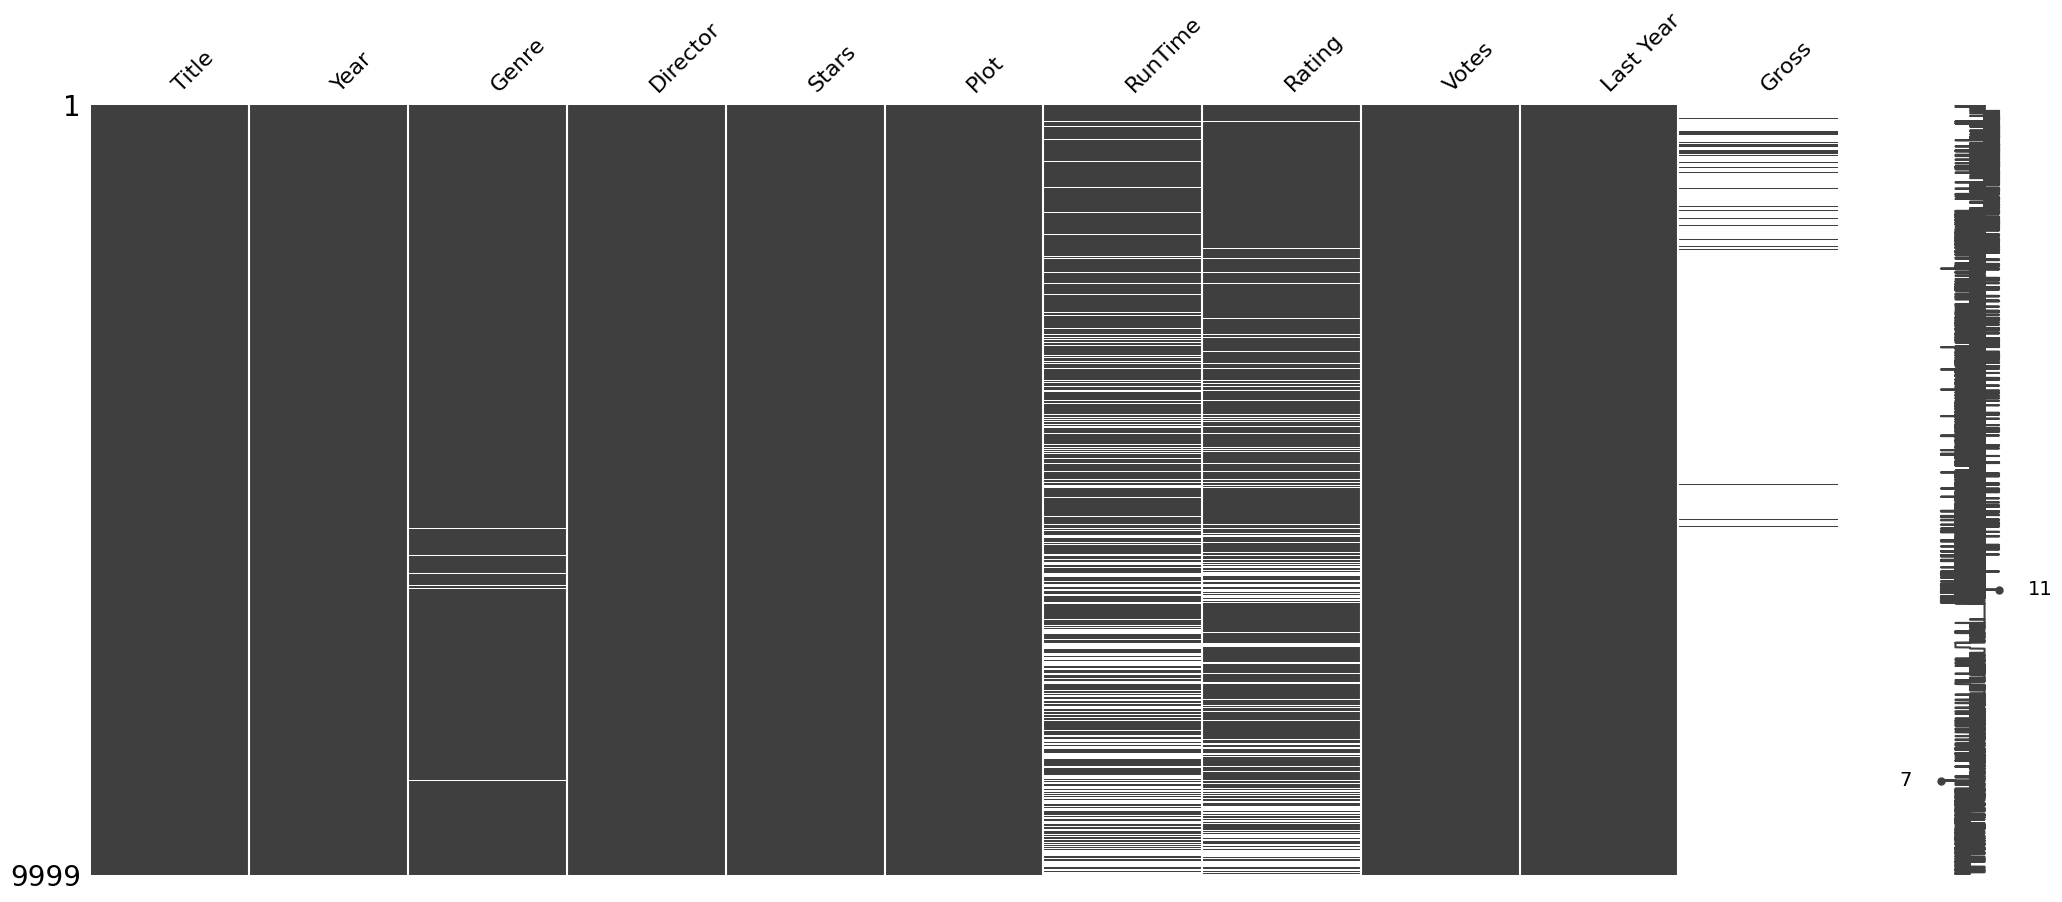

In [71]:
msno.matrix(MOVIES)

In [72]:
#Show missing Plot populated as 'Add a Plot'
MOVIES[MOVIES['Plot']=='Add a Plot']

,Title,Year,Genre,Director,Stars,Plot,RunTime,Rating,Votes,Last Year,Gross
1916,Twilight of the Gods,0,"Animation, Action, Adventure",-,"Pilou Asbæk, Jamie Chung, Jamie Clayton, Laure...",Add a Plot,NaN,NaN,0,0,NaN
2610,Past Midnight,0,"Action, Adventure, Drama",Rick Famuyiwa,Keanu Reeves,Add a Plot,NaN,NaN,0,0,NaN
2710,Thomas & Friends: All Engines Go!,2021,"Animation, Adventure, Comedy",-,"Johnathan Michael, Shomoy James Mitchell",Add a Plot,30.0,NaN,0,0,NaN
2775,The Princess Switch 3,2021,"Comedy, Drama, Family",Mike Rohl,"Vanessa Hudgens, Nick Sagar, Remy Hii, Amanda ...",Add a Plot,NaN,NaN,0,0,NaN
3144,Our Man from Jersey,0,NaN,-,"Mark Wahlberg, Halle Berry",Add a Plot,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,2021,"Adventure, Drama, Fantasy",-,"Morgan Taylor Campbell, Chris Cope, Iñaki Godo...",Add a Plot,NaN,NaN,0,0,NaN
9995,Arcane,2021,"Animation, Action, Adventure",-,-,Add a Plot,NaN,NaN,0,0,NaN
9996,Heart of Invictus,2022,"Documentary, Sport",Orlando von Einsiedel,Prince Harry,Add a Plot,NaN,NaN,0,0,NaN
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",Jovanka Vuckovic,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J...",Add a Plot,NaN,NaN,0,0,NaN


In [73]:
#Replace 'Add a Plot' with '-'
MOVIES['Plot'] = MOVIES['Plot'].str.replace('Add a Plot', '-')

In [74]:
MOVIES['Plot'].isnull().sum()
MOVIES['Genre'].isnull().sum()
MOVIES['RunTime'].isnull().sum()
# MOVIES['Director'].isnull().sum()

np.int64(2958)

In [75]:
#For the attributes Genre, RunTime, Rating and Gross I kept the NaN without replacing them
MOVIES[MOVIES['Genre'].isnull()]

,Title,Year,Genre,Director,Stars,Plot,RunTime,Rating,Votes,Last Year,Gross
2124,Rodney & Sheryl,0,NaN,Chloe Okuno,Anna Kendrick,Based on the unbelievable true story of serial...,NaN,NaN,0,0,NaN
3144,Our Man from Jersey,0,NaN,-,"Mark Wahlberg, Halle Berry",-,NaN,NaN,0,0,NaN
3433,The Upper World,0,NaN,Star:Daniel Kaluuya,-,Esso is caught in a deadly feud and on the ver...,NaN,NaN,0,0,NaN
3695,Kod Adi: Kulüp,2021,NaN,-,"Gökçe Bahadir, Baris Arduç, Salih Bademci, Ali...",-,NaN,NaN,0,0,NaN
4039,Oompa-Loompas,0,NaN,-,-,TV series centering on the adventures of the l...,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6453,Untitled Tituss Burgess/Netflix Project,0,NaN,-,-,Plot under wraps.,NaN,NaN,0,0,NaN
6461,One Piece: Enter Chopper at the Winter Island,2020,NaN,-,-,-,NaN,NaN,0,0,NaN
8769,Rádio Coisa Mais Linda,2020,NaN,Caito Ortiz,"Maria Casadevall, Pathy Dejesus, Mel Lisboa, L...",-,NaN,NaN,0,0,NaN
8770,Rádio Coisa Mais Linda,2020,NaN,Caito Ortiz,"Maria Casadevall, Pathy Dejesus, Mel Lisboa, L...",-,NaN,NaN,0,0,NaN


**5. Outliers Detection**

_Z-Score_

In [76]:
def ZS(data, threshold):
    mean = np.mean(data)
    sd = np.std(data) # calculate standard deviation
    outliers = [] # create empty list to store outliers
    for i in data: # detect outliers
        z = (i - mean) / sd  # calculate z-score
        if abs(z) > threshold:  # identify outliers
            outliers.append(i)  # add to the empty list

    # print outliers
    # print("The detected outliers are: ", str(outliers))
            
    return outliers

In [77]:
ZS(MOVIES['Votes'],2)

[885805,
 414849,
 665387,
 264222,
 286488,
 266258,
 1552311,
 885856,
 880918,
 320264,
 393414,
 459913,
 347857,
 404273,
 213522,
 248583,
 378030,
 336484,
 171804,
 242582,
 374263,
 341858,
 469407,
 206090,
 169517,
 341221,
 624036,
 231013,
 270445,
 293434,
 266386,
 336801,
 226962,
 200421,
 492438,
 177274,
 205979,
 216203,
 897444,
 312584,
 374963,
 312629,
 216458,
 205119,
 237601,
 414712,
 284554,
 159666,
 322307,
 839029,
 175513,
 1713028,
 340148,
 212616,
 264801,
 228484,
 284373,
 157666,
 235694,
 558731,
 265845,
 194777,
 1227522,
 375261,
 895888,
 337900,
 517014,
 476656,
 139934,
 1034554,
 751815,
 480607,
 155875,
 141784,
 363012,
 182173,
 774632,
 194461,
 170844,
 371194,
 236161,
 387903,
 345455,
 1691777,
 468655,
 709684,
 205638,
 195117,
 623912,
 752553,
 250587,
 141605,
 390167,
 150455,
 215795,
 697750,
 262556,
 682809,
 294292,
 149002,
 239770,
 732244,
 1529752,
 195752,
 198056,
 197909,
 157990,
 276173,
 144032,
 622998,
 657

In [78]:
MOVIES[MOVIES['Votes'].isin(ZS(MOVIES['Votes'],2))]

,Title,Year,Genre,Director,Stars,Plot,RunTime,Rating,Votes,Last Year,Gross
2,The Walking Dead,2010,"Drama, Horror, Thriller",-,"Andrew Lincoln, Norman Reedus, Melissa McBride...",Sheriff Deputy Rick Grimes wakes up from a com...,44.0,8.2,885805,2022,NaN
3,Rick and Morty,2013,"Animation, Adventure, Comedy",-,"Justin Roiland, Chris Parnell, Spencer Grammer...",An animated series that follows the exploits o...,23.0,9.2,414849,0,NaN
7,Dexter,2006,"Crime, Drama, Mystery",-,"Michael C. Hall, Jennifer Carpenter, David Zay...","By day, mild-mannered Dexter is a blood-spatte...",53.0,8.6,665387,2013,NaN
11,Lucifer,2016,"Crime, Drama, Fantasy",-,"Tom Ellis, Lesley-Ann Brandt, Lauren German, D...",Lucifer Morningstar has decided he's had enoug...,42.0,8.1,264222,2021,NaN
14,American Horror Story,2011,"Drama, Horror, Thriller",-,"Lady Gaga, Kathy Bates, Angela Bassett, Sarah ...",An anthology series centering on different cha...,60.0,8.0,286488,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
906,Taken 2,2012,"Action, Crime, Thriller",Olivier Megaton,"Liam Neeson, Famke Janssen, Maggie Grace, Lela...","In Istanbul, retired CIA operative Bryan Mills...",92.0,6.3,295140,0,139.85
909,The Ugly Truth,2009,"Comedy, Romance",Robert Luketic,"Katherine Heigl, Gerard Butler, Bree Turner, E...",An uptight television producer takes control o...,96.0,6.4,209052,0,88.92
953,The Promise,2016,"Action, Adventure, Drama",Terry George,"Oscar Isaac, Charlotte Le Bon, Christian Bale,...",Set during the last days of the Ottoman Empire...,133.0,6.0,174181,0,NaN
999,Tenkû no shiro Rapyuta,1986,"Animation, Adventure, Drama",Hayao Miyazaki,"Mayumi Tanaka, Keiko Yokozawa, Kotoe Hatsui, M...",A young boy and a girl with a magic crystal mu...,125.0,8.0,155408,0,NaN


In [79]:
min(ZS(MOVIES['Votes'],2))

139934

In [80]:
# I check which movie has the min of votes to try to uderstand if it is feasable
MOVIES[MOVIES['Votes']==min(ZS(MOVIES['Votes'],2))]

,Title,Year,Genre,Director,Stars,Plot,RunTime,Rating,Votes,Last Year,Gross
154,Glee,2009,"Comedy, Drama, Music",-,"Lea Michele, Jane Lynch, Matthew Morrison, Cor...",A group of ambitious misfits try to escape the...,44.0,6.7,139934,2015,NaN


In [81]:
max(ZS(MOVIES['Votes'],2))

1713028

In [82]:
# I check which movie has the max of votes to try to uderstand if it is feasable
MOVIES[MOVIES['Votes']==max(ZS(MOVIES['Votes'],2))]

,Title,Year,Genre,Director,Stars,Plot,RunTime,Rating,Votes,Last Year,Gross
111,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",A meek Hobbit from the Shire and eight compani...,178.0,8.8,1713028,0,315.54


In [83]:
def print_ZS(th):
    all_outliers=[]
    col_outliers=[]
    for col in MOVIES[['Year','RunTime','Rating','Votes','Gross']]:
        col_outliers.append(col)
        all_outliers.append(ZS(MOVIES[col],th))

    for i in range(5):
        print(f'{col_outliers[i]} : {all_outliers[i]}')
        print(f'Max of {col_outliers[i]} outliers: ',max(all_outliers[i]))
        print(f'Min of {col_outliers[i]} outliers: ',min(all_outliers[i]))
        print()

In [84]:
MOVIES[MOVIES['Rating']==min(ZS(MOVIES['Rating'],2))]

,Title,Year,Genre,Director,Stars,Plot,RunTime,Rating,Votes,Last Year,Gross
1166,Raketsonyeondan,2021,"Comedy, Drama, Sport",-,"Kim Sang-kyung, Na-ra Oh, Tang Joon-sang, Sang...",A city kid is brought to the countryside by hi...,80.0,1.1,25629,0,NaN


In [85]:
max_gross = MOVIES['Gross'].max()
max_gross

np.float64(504.01)

In [86]:
MOVIES[MOVIES['Gross']==MOVIES['Gross'].max()]


,Title,Year,Genre,Director,Stars,Plot,RunTime,Rating,Votes,Last Year,Gross
329,Beauty and the Beast,2017,"Family, Fantasy, Musical",Bill Condon,"Emma Watson, Dan Stevens, Luke Evans, Josh Gad",A selfish Prince is cursed to become a monster...,129.0,7.1,284484,0,504.01


_Standard Deviation_

In [87]:
def STD(data, th):
    mean = data.mean()
    std = data.std()
    V1 = mean + th * std
    V2 = mean - th * std
    outliers = []
    outliers_ind = []
    for d in data:
        if (d > V1) | (d < V2):
            outliers.append(d)

    return outliers

In [88]:
def print_STD(th):
    all_outliers=[]
    col_outliers=[]
    for col in MOVIES[['Year','RunTime','Rating','Votes','Gross']]:
        col_outliers.append(col)
        all_outliers.append(STD(MOVIES[col],th))

    for i in range(5):
        print(f'{col_outliers[i]} : {all_outliers[i]}')
        print(f'Max of {col_outliers[i]} outliers: ',max(all_outliers[i]))
        print(f'Min of {col_outliers[i]} outliers: ',min(all_outliers[i]))
        print()

In [89]:
min_votes = MOVIES.loc[MOVIES['Votes'] > 0, 'Votes'].min()

print(f"Minimum Votes (excluding 0 and NaN): {min_votes}")


Minimum Votes (excluding 0 and NaN): 5


In [90]:
MOVIES[MOVIES['Rating']==9.9]

,Title,Year,Genre,Director,Stars,Plot,RunTime,Rating,Votes,Last Year,Gross
7640,BoJack Horseman,2014,"Animation, Comedy, Drama",Amy Winfrey,"Will Arnett, Amy Sedaris, Alison Brie, Paul F....",BoJack reconnects with faces from his past.,26.0,9.9,12369,2020,NaN
8510,Avatar: The Last Airbender,2005,"Animation, Action, Adventure",Joaquim Dos Santos,"Zach Tyler, Mae Whitman, Jack De Sena, Michael...",Aang's moment of truth arrives. Can he defeat ...,92.0,9.9,8813,2008,NaN


In [91]:
min_votes = MOVIES.loc[MOVIES['Gross'] > 0, 'Gross'].min()

print(f"Minimum Gross (excluding 0 and NaN): {min_votes}")

Minimum Gross (excluding 0 and NaN): 0.01


In [92]:
MOVIES[MOVIES['Gross']==0.01]

,Title,Year,Genre,Director,Stars,Plot,RunTime,Rating,Votes,Last Year,Gross
512,The Clovehitch Killer,2018,"Crime, Drama, Mystery",Duncan Skiles,"Dylan McDermott, Charlie Plummer, Samantha Mat...",A picture-perfect family is shattered when the...,109.0,6.6,21572,0,0.01
917,Sweet Virginia,2017,"Action, Drama, Thriller",Jamie M. Dagg,"Jon Bernthal, Christopher Abbott, Imogen Poots...",A former rodeo champ befriends a young man wit...,93.0,6.2,9324,0,0.01
1216,Honeymoon,2014,"Drama, Fantasy, Horror",Leigh Janiak,"Rose Leslie, Harry Treadaway, Ben Huber, Hanna...",A newlywed couple finds their lake-country hon...,87.0,5.7,24861,0,0.01
1317,Duck Butter,2018,"Comedy, Drama, Romance",Miguel Arteta,"Alia Shawkat, Drew Langer, Marc Maron, Mark Du...","Two women, who are dissatisfied with the disho...",93.0,5.3,3531,0,0.01
1508,Into the Forest,2015,"Drama, Thriller",Patricia Rozema,"Elliot Page, Evan Rachel Wood, Max Minghella, ...","After a massive power outage, two sisters lear...",101.0,5.8,19853,0,0.01
1609,Forces spéciales,2011,"Action, Drama, War",Stéphane Rybojad,"Diane Kruger, Djimon Hounsou, Benoît Magimel, ...",A French journalist in Afghanistan is kidnappe...,109.0,6.4,18275,0,0.01
1686,Skjelvet,2018,"Action, Drama, Thriller",John Andreas Andersen,"Kristoffer Joner, Ane Dahl Torp, Edith Haagenr...",In 1904 an earthquake of magnitude 5.4 on the ...,106.0,6.2,10622,0,0.01
1729,Blue Jay,2016,"Drama, Romance",Alex Lehmann,"Mark Duplass, Sarah Paulson, Clu Gulager, Jame...",Meeting by chance when they return to their ti...,80.0,7.3,15777,0,0.01
2064,Wildflower,2014,"Drama, Thriller",Nicholas DiBella,"Nathalia Ramos, Cody Longo, Alexa Rose Steele,...",A college student struggling with a painful ch...,92.0,5.3,866,0,0.01
2852,Finding Bliss,2009,"Comedy, Romance",Julie Davis,"Leelee Sobieski, Matthew Davis, Jamie Kennedy,...",A romantic comedy that explores the adult film...,96.0,5.3,2442,0,0.01


In [93]:
def PERC(data):
    V1 = np.percentile(data, 99)
    V2 = np.percentile(data , 1)
    outliers = []
    for d in data:
        if (d > V1) | (d < V2):
            outliers.append(d)

    return outliers

In [94]:
def print_PERC():
    all_outliers=[]
    col_outliers=[]
    for col in MOVIES[['Year','RunTime','Rating','Votes','Gross']]:
        col_outliers.append(col)
        all_outliers.append(PERC(MOVIES[col]))

    for i in range(5):
        print(f'{col_outliers[i]} : {all_outliers[i]}')
        print(f'Max of {col_outliers[i]} outliers: ',max(all_outliers[i]))
        print(f'Min of {col_outliers[i]} outliers: ',min(all_outliers[i]))
        print()

In [95]:
def ZSB(data, threshold):
    # Robust Zscore as a function of median and median
    # median absolute deviation (MAD) defined as
    # z-score = |x – median(x)| / mad(x)
    median = np.median(data)
    print("Median: ",median)
    median_absolute_deviation = np.median(np.abs(data - median))
    modified_z_scores = (data - median) / median_absolute_deviation
    outliers = data[np.abs(modified_z_scores) > threshold]
    # print outliers
    print("The detected outliers are: ", str(outliers))

In [96]:
def print_ZSB(th):
    for col in MOVIES[['Year','RunTime','Rating','Votes','Gross']]:
        ZSB(MOVIES[col],th)

In [97]:
def IQR(data):
    sorted(data)
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    outliers = data[((data < lower_range) | (data > upper_range))]
    # print outliers
    print("The detected outliers are: ", str(outliers))

In [98]:
def print_IQR():
    for col in MOVIES[['Year','RunTime','Rating','Votes','Gross']]:
        IQR(MOVIES[col])

In [99]:
# print_ZS(3)
# print_STD(0.5301)
# print_ZSB(1)
# print_PERC()
# print_IQR()
IQR(MOVIES['RunTime'])

The detected outliers are:  Series([], Name: RunTime, dtype: float64)


In [100]:
MOVIES.iloc[9955]


Title                                     Love, Death & Robots
Year                                                      2019
Genre                     Animation, Short, Comedy            
Director     Directors:Dominique Boidin, Léon Bérelle, Rémi...
Stars        Peter Franzén, Zita Hanrot, Alaïs Lawson, Jonn...
Plot         On an arid, scorched planet at the edge of gal...
RunTime                                                   18.0
Rating                                                     7.9
Votes                                                     6873
Last Year                                                    0
Gross                                                      NaN
Name: 9955, dtype: object

<Axes: ylabel='RunTime'>

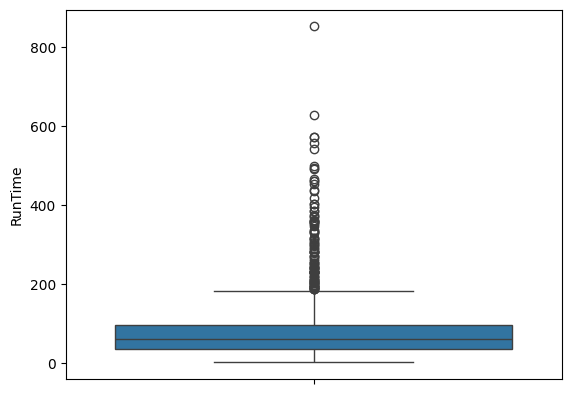

In [101]:
import seaborn as sns
#Box Plot
sns.boxplot(MOVIES["RunTime"])

C:\Users\casa\AppData\Local\Temp\ipykernel_6288\3072588850.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


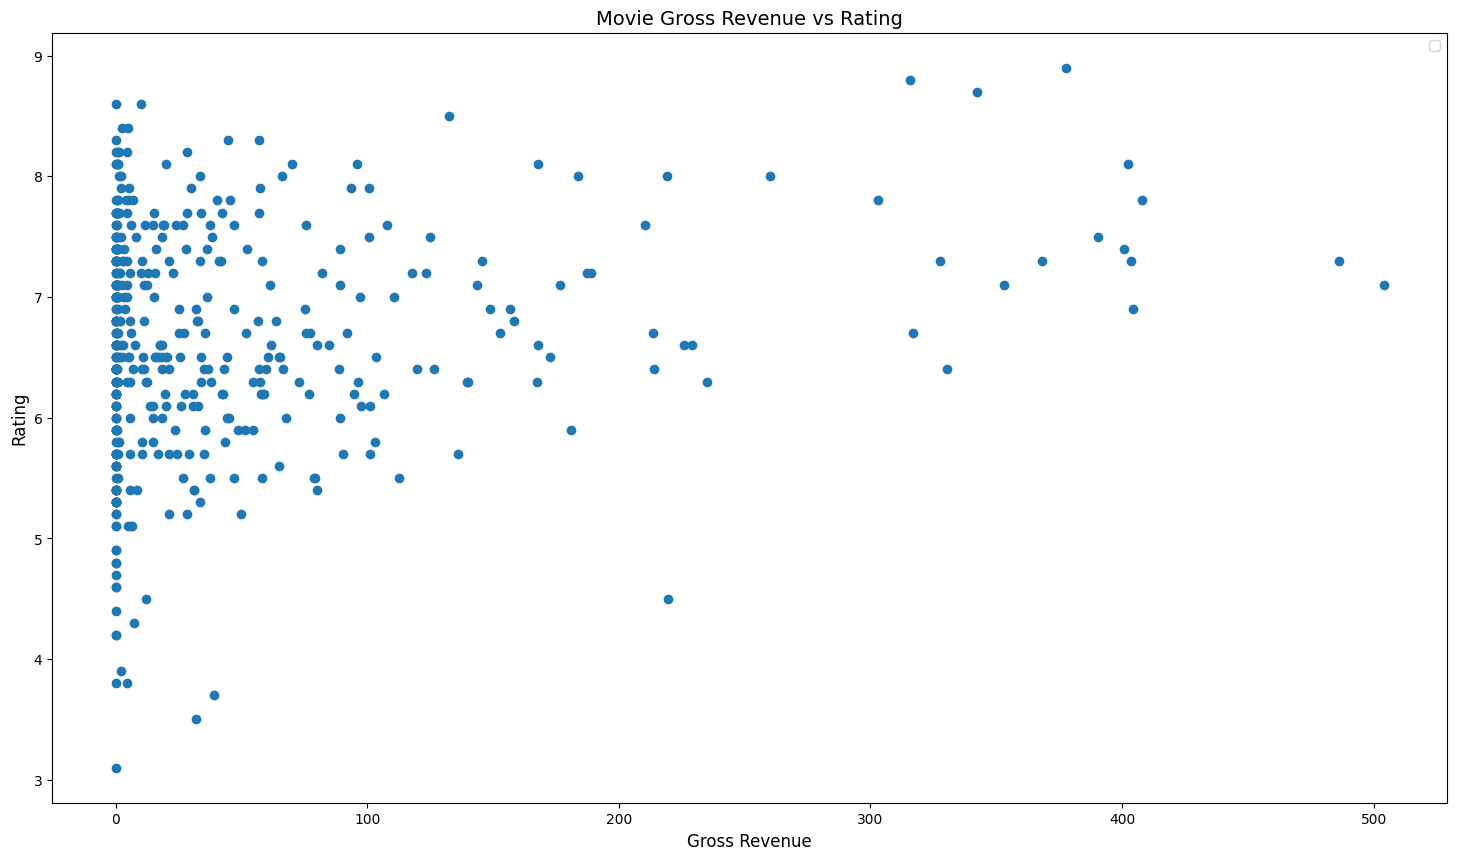

In [102]:
import matplotlib.pyplot as plt
#Scatter Plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(MOVIES["Gross"],MOVIES["Rating"])

# Adding labels and legend
plt.xlabel("Gross Revenue", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.title("Movie Gross Revenue vs Rating", fontsize=14)
plt.legend()

plt.show()

In [103]:
MOVIES['RunTime'].max()

np.float64(853.0)

In [104]:
# MOVIES[MOVIES['RunTime']==853]
MOVIES[MOVIES['Gross']==0]

,Title,Year,Genre,Director,Stars,Plot,RunTime,Rating,Votes,Last Year,Gross
1111,I Spit on Your Grave 2,2013,"Horror, Thriller",Steven R. Monroe,"Jemma Dallender, Joe Absolom, Yavor Baharov, G...",When Katie innocently accepts an offer to have...,106.0,5.7,28118,0,0.0
1287,Take Me,2017,"Comedy, Crime, Mystery",Pat Healy,"Pat Healy, Taylor Schilling, Alycia Delmore, J...",Ray is a fledgling entrepreneur who specialize...,83.0,6.1,5088,0,0.0
1573,Jue di tao wang,2016,"Action, Adventure, Comedy",Renny Harlin,"Jackie Chan, Johnny Knoxville, Bingbing Fan, E...",A detective from Hong Kong teams up with an Am...,107.0,5.7,19872,0,0.0
2130,Contracted,2013,"Drama, Horror, Thriller",Eric England,"Najarra Townsend, Caroline Williams, Alice Mac...","After being drugged and raped at a party, a yo...",84.0,5.3,14668,0,0.0
2245,V/H/S Viral,2014,"Horror, Thriller","Directors:Justin Benson, Gregg Bishop, Todd Li...","Patrick Lawrie, Emilia Ares, Celia K. Milius, ...",A Los Angeles police chase sends a fame-obsess...,81.0,4.2,15520,0,0.0
2313,Ashby,2015,"Comedy, Crime, Drama",Tony McNamara,"Mickey Rourke, Nat Wolff, Emma Roberts, Sarah ...",High-school student Ed Wallis enters into a fr...,100.0,6.4,15197,0,0.0
3124,I'm Reed Fish,2006,"Comedy, Drama, Romance",Zackary Adler,"Jay Baruchel, Alexis Bledel, Victor Rasuk, Sch...",Reed Fish's life turns into chaos when a high ...,93.0,5.7,4283,0,0.0
4424,The Bad Kids,2016,Documentary,"Directors:Keith Fulton, Louis Pepe","Vonda Viland, Julia Alexander, Laura Ambrosius...",A group of teachers at a Mojave Desert high sc...,101.0,7.0,612,0,0.0
4637,Life's a Breeze,2013,"Comedy, Drama",Lance Daly,"Kelly Thornton, Fionnula Flanagan, Pat Shortt,...",Tells the story of a family as they search for...,83.0,6.3,1103,0,0.0
4641,The Reconstruction of William Zero,2014,"Drama, Mystery, Sci-Fi",Dan Bush,"Conal Byrne, Amy Seimetz, Scott Poythress, Lak...",A geneticist wakes up from an accident with on...,98.0,5.4,1147,0,0.0


In [105]:
cleaned_data = MOVIES['Gross'].dropna()
IQR(cleaned_data)

The detected outliers are:  85      402.45
111     315.54
128     260.00
132     132.38
143     167.77
144     404.52
159     210.61
161     327.48
165     390.53
171     303.00
181     353.01
193     377.85
196     403.71
197     316.83
206     188.76
220     213.52
225     226.01
226     408.08
245     168.05
255     183.64
260     342.55
267     140.22
271     172.56
283     330.36
329     504.01
351     400.74
385     176.48
390     126.66
407     117.72
410     229.09
465     143.53
486     125.10
500     136.19
508     187.17
510     158.35
539     123.48
558     152.90
576     218.97
578     486.30
587     181.17
645     148.73
649     156.65
664     167.51
684     145.79
746     368.06
749     234.91
845     214.03
906     139.85
1196    119.79
1328    219.61
Name: Gross, dtype: float64


In [106]:
Q1 = cleaned_data.quantile(0.25)
Q3 = cleaned_data.quantile(0.75)
print('Q1: ', Q1)
print('Q3: ', Q3)
# Calculate IQR
IQR = Q3 - Q1
print('IQR: ', IQR)
# Define outlier boundaries
lower_bound = 0.02
upper_bound = Q3 + 1.5 * IQR
print('lower_bound: ', lower_bound)
print('upper_bound: ', upper_bound)

Q1:  0.15
Q3:  46.9475
IQR:  46.7975
lower_bound:  0.02
upper_bound:  117.14374999999998


<Axes: ylabel='Gross'>

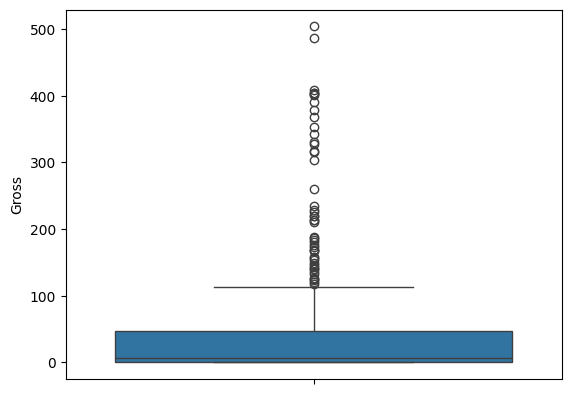

In [107]:
sns.boxplot(cleaned_data)

In [108]:
MOVIES['Rating'].min()

np.float64(1.1)

In [109]:
from sklearn.neighbors import LocalOutlierFactor

def LOF_outlier_detection(X):
    data = X
    # requires no missing value
    # select top 10 outliers

    # fit the model for outlier detection (default)
    clf = LocalOutlierFactor(n_neighbors=4, contamination=0.1)

    clf.fit_predict(X)

    LOF_scores = clf.negative_outlier_factor_
    # Outliers tend to have a negative score far from -1

    # print(LOF_scores)

    outliers = X[LOF_scores < -1].index

    print("Outliers: ", data.iloc[outliers])

In [110]:
def LOF_outlier_detection2(X):
    # Create and fit the LOF detector
    clf = LocalOutlierFactor(n_neighbors=5)
    y_pred = clf.fit_predict(X)
    LOF_scores = clf.negative_outlier_factor_
    
    # Find indices where LOF scores are less than threshold
    outlier_indices = np.where(LOF_scores < -1)[0]
    outlier_values = X[outlier_indices]
    
    print("Outlier indices:", outlier_indices)
    print("Outlier values:", outlier_values)
    return outlier_indices, outlier_values

In [111]:
cleaned_Votes=MOVIES['Votes'].dropna()
votes_reshaped = cleaned_Votes.values.reshape(-1, 1)

LOF_outlier_detection2(votes_reshaped)

Outlier indices: [   1    2    3 ... 9954 9955 9963]
Outlier values: [[ 17870]
 [885805]
 [414849]
 ...
 [  5868]
 [  6873]
 [   911]]


(array([   1,    2,    3, ..., 9954, 9955, 9963]),
 array([[ 17870],
        [885805],
        [414849],
        ...,
        [  5868],
        [  6873],
        [   911]]))

_k-Nearest Neighbors (KNN)_


In [112]:
#exploiting the consistency rating-votes I use only not null values for this attribute to use the model
from annotated_types import IsNotNan


clean_votes=MOVIES['Votes']
clean_rating=MOVIES['Rating'].dropna()
MOVIES_P = MOVIES[(MOVIES['Rating'].notna()) & (MOVIES['Votes'] > 0)]
MOVIES_S=MOVIES_P[['Rating','Votes']] #I dont' use Attributes with too many null
MOVIES_S.head(1)


,Rating,Votes
0,6.1,21062


In [113]:
X = MOVIES_S.values
X

array([[6.10000e+00, 2.10620e+04],
       [5.00000e+00, 1.78700e+04],
       [8.20000e+00, 8.85805e+05],
       ...,
       [7.10000e+00, 1.00000e+02],
       [8.20000e+00, 9.11000e+02],
       [8.80000e+00, 4.33000e+02]])

In [114]:
from sklearn.neighbors import NearestNeighbors
#Instantiate model (KNN)
KNN = NearestNeighbors(n_neighbors=3)

KNN.fit(X)

NearestNeighbors(n_neighbors=3)

In [115]:
#Distances and indexes of k-neaighbors from model outputs
distances, indexes = KNN.kneighbors(X)
# distances
distances.mean(axis=1)

array([1.30326313e+01, 2.67407555e+01, 1.64600083e+03, ...,
       3.00000000e-01, 7.07673850e-01, 6.92344320e-01])

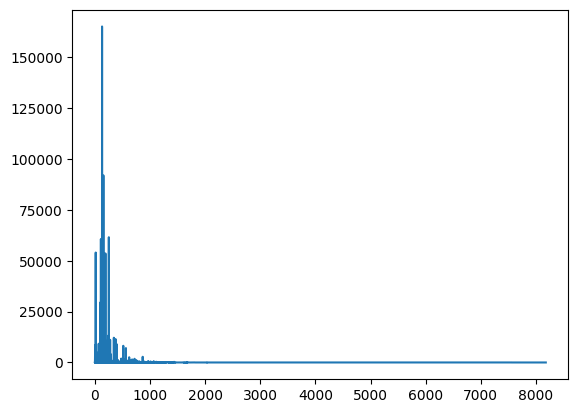

In [116]:
#Plot mean of k-distances of each observation
plt.plot(distances.mean(axis=1))

In [117]:
#Visual cutoff
outliers_indexes=np.where(distances.mean(axis=1)>37500)
outliers_indexes


(array([ 15, 109, 130, 154, 191, 253]),)

In [118]:
#Filter outlier values
outliers_values=MOVIES.iloc[outliers_indexes]
outliers_values

,Title,Year,Genre,Director,Stars,Plot,RunTime,Rating,Votes,Last Year,Gross
15,Grey's Anatomy,2005,"Drama, Romance",-,"Ellen Pompeo, Chandra Wilson, James Pickens Jr...",A drama centered on the personal and professio...,41.0,7.5,266258,0,NaN
109,Supergirl,2015,"Action, Adventure, Drama",-,"Melissa Benoist, Chyler Leigh, David Harewood,...",The adventures of Superman's cousin in her own...,43.0,6.2,115373,2021,NaN
130,The Punisher,2017,"Action, Crime, Drama",-,"Jon Bernthal, Amber Rose Revah, Ben Barnes, Ja...","After the murder of his family, Marine veteran...",53.0,8.5,194777,2019,NaN
154,Glee,2009,"Comedy, Drama, Music",-,"Lea Michele, Jane Lynch, Matthew Morrison, Cor...",A group of ambitious misfits try to escape the...,44.0,6.7,139934,2015,NaN
191,The Irishman,2019,"Biography, Crime, Drama",Martin Scorsese,"Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",Hitman Frank Sheeran looks back at the secrets...,209.0,7.8,345455,0,7.0
253,Bloodline,2015,"Drama, Thriller",-,"Kyle Chandler, Ben Mendelsohn, Linda Cardellin...",A family finds themselves forced to face their...,60.0,7.9,46111,2017,NaN


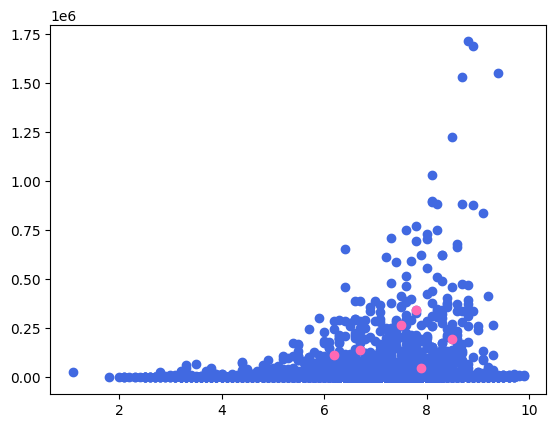

In [119]:
#Plot data
plt.scatter(MOVIES["Rating"], MOVIES["Votes"], color = "royalblue")
plt.scatter(outliers_values["Rating"], outliers_values["Votes"], color = "hotpink")
plt.show()

_DBSCAN_


In [120]:
from sklearn.cluster import DBSCAN

In [121]:
#Inizialize and Fit DBSCAN Clustering Algorithm
dbscan = DBSCAN(min_samples = 2, eps = 0.13)
clusters=dbscan.fit_predict(MOVIES_S)
clusters

array([-1, -1, -1, ..., -1, -1, -1])

In [122]:
#Founded outliers belong to the cluster -1
clusters[clusters>1]=0
list(clusters).count(-1)

6261

In [123]:
# #Plot data

# #Colormap
# colormap = np.array(['royalblue', 'hotpink'])

# plt.scatter(MOVIES_S[:,0], MOVIES_S[:,1],c=colormap[clusters], cmap='Paired')
# plt.title("DBSCAN")

InvalidIndexError: (slice(None, None, None), 0)

**6. Similarity Measures and Duplicate Detection**

In [125]:
MOVIES[MOVIES.duplicated()]

,Title,Year,Genre,Director,Stars,Plot,RunTime,Rating,Votes,Last Year,Gross
6833,Mighty Little Bheem,2019,"Animation, Short, Adventure","Directors:Rajiv Chilaka, Krishna Mohan Chintap...",-,-,NaN,NaN,0,0,NaN
6835,Mighty Little Bheem,2019,"Animation, Short, Adventure","Directors:Rajiv Chilaka, Krishna Mohan Chintap...",-,-,NaN,9.0,6,0,NaN
6836,Mighty Little Bheem,2019,"Animation, Short, Adventure","Directors:Rajiv Chilaka, Krishna Mohan Chintap...",-,-,NaN,9.0,6,0,NaN
6837,Mighty Little Bheem,2019,"Animation, Short, Adventure","Directors:Rajiv Chilaka, Krishna Mohan Chintap...",-,-,NaN,NaN,0,0,NaN
6838,Mighty Little Bheem,2019,"Animation, Short, Adventure","Directors:Rajiv Chilaka, Krishna Mohan Chintap...",-,-,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9989,1899,2022,"Drama, History, Horror",Baran bo Odar,-,-,NaN,NaN,0,0,NaN
9990,1899,2022,"Drama, History, Horror",Baran bo Odar,-,-,NaN,NaN,0,0,NaN
9991,1899,2022,"Drama, History, Horror",Baran bo Odar,-,-,NaN,NaN,0,0,NaN
9992,1899,2022,"Drama, History, Horror",Baran bo Odar,-,-,NaN,NaN,0,0,NaN


In [126]:
MOVIES.drop_duplicates()

,Title,Year,Genre,Director,Stars,Plot,RunTime,Rating,Votes,Last Year,Gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",A woman with a mysterious illness is forced in...,121.0,6.1,21062,0,NaN
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",-,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",The war for Eternia begins again in what may b...,25.0,5.0,17870,0,NaN
2,The Walking Dead,2010,"Drama, Horror, Thriller",-,"Andrew Lincoln, Norman Reedus, Melissa McBride...",Sheriff Deputy Rick Grimes wakes up from a com...,44.0,8.2,885805,2022,NaN
3,Rick and Morty,2013,"Animation, Adventure, Comedy",-,"Justin Roiland, Chris Parnell, Spencer Grammer...",An animated series that follows the exploits o...,23.0,9.2,414849,0,NaN
4,Army of Thieves,2021,"Action, Crime, Horror",Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...","A prequel, set before the events of Army of th...",NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"Drama, Thriller",Nicolai Rohde,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro...",-,NaN,NaN,0,0,NaN
9995,Arcane,2021,"Animation, Action, Adventure",-,-,-,NaN,NaN,0,0,NaN
9996,Heart of Invictus,2022,"Documentary, Sport",Orlando von Einsiedel,Prince Harry,-,NaN,NaN,0,0,NaN
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",Jovanka Vuckovic,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J...",-,NaN,NaN,0,0,NaN


In [127]:
#I check which movie titles have duplicates
MOVIES_COUNT = MOVIES['Title'].value_counts()
MOVIES_COUNT

Title
 Bleach: Burîchi                         65
 Mighty Little Bheem                     64
 Avatar: The Last Airbender              61
 La Reina de Indias y el Conquistador    60
 Dexter                                  48
                                         ..
Halston                                   1
Castle Rock                               1
 Totenfrau                                1
 Arcane                                   1
 Shûmatsu no Valkyrie                     1
Name: count, Length: 6817, dtype: int64

In [128]:
MOVIES['Title'].nunique()

6817

**_Record Linkage (RL_)**

In [129]:
!pip install python-Levenshtein pyphonetics jaro-winkler recordlinkage

In [134]:
import Levenshtein as lev
import pyphonetics
from pyphonetics import Soundex
import jaro
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import recordlinkage
from recordlinkage.datasets import load_febrl1

*blocking*

In [135]:
# 1) I drop all exact match
MOVIES_A=MOVIES.drop_duplicates()

In [137]:
MOVIES_A


,Title,Year,Genre,Director,Stars,Plot,RunTime,Rating,Votes,Last Year,Gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",A woman with a mysterious illness is forced in...,121.0,6.1,21062,0,NaN
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",-,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",The war for Eternia begins again in what may b...,25.0,5.0,17870,0,NaN
2,The Walking Dead,2010,"Drama, Horror, Thriller",-,"Andrew Lincoln, Norman Reedus, Melissa McBride...",Sheriff Deputy Rick Grimes wakes up from a com...,44.0,8.2,885805,2022,NaN
3,Rick and Morty,2013,"Animation, Adventure, Comedy",-,"Justin Roiland, Chris Parnell, Spencer Grammer...",An animated series that follows the exploits o...,23.0,9.2,414849,0,NaN
4,Army of Thieves,2021,"Action, Crime, Horror",Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...","A prequel, set before the events of Army of th...",NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"Drama, Thriller",Nicolai Rohde,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro...",-,NaN,NaN,0,0,NaN
9995,Arcane,2021,"Animation, Action, Adventure",-,-,-,NaN,NaN,0,0,NaN
9996,Heart of Invictus,2022,"Documentary, Sport",Orlando von Einsiedel,Prince Harry,-,NaN,NaN,0,0,NaN
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",Jovanka Vuckovic,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J...",-,NaN,NaN,0,0,NaN


In [138]:
#Many of these record pairs do not belong to the same person.
#The recordlinkage toolkit has some more advanced indexing methods to reduce the number of record pairs.
#Obvious not-matches are left out of the index.
#Note that if a matching record pair is not included in the index, it can not be matched anymore
indexer = recordlinkage.Index()
indexer.block('Title') # the blocks are builded on the basis of the provided attribute or attributes
candidate_links=indexer.index(MOVIES_A)

In [139]:
#The comparison will be limited to records with the same Title
print(len(candidate_links))
candidate_links

22206


MultiIndex([( 309,  177),
            ( 435,   34),
            ( 576,  329),
            ( 589,  254),
            ( 990,  509),
            (1105,  139),
            (1156,  247),
            (1311,  802),
            (1361,   34),
            (1361,  435),
            ...
            (9987, 8183),
            (9987, 8184),
            (9987, 8825),
            (9987, 9711),
            (9987, 9834),
            (9987, 9983),
            (9987, 9986),
            (9997, 9935),
            (9998, 9935),
            (9998, 9997)],
           length=22206)

_Comparison between candidate pairs_

In [140]:
#Compare records
compare_cl = recordlinkage.Compare()
#Define the way in which the tuples should be compared specifying the list of attributes
# these two attributes have to match exactly
compare_cl.exact('Title', 'Title', label='CheckTitle')
compare_cl.exact('Year', 'Year', label='CheckYear')
#Here we compare attributes based on a similarity measure
compare_cl.string('Director', 'Director', method='jarowinkler', threshold=0.90, label='CheckDirector')
# compare_cl.string('Director', 'Director', method='levenshtein', threshold=0.90, label='CheckDirector')
compare_cl.string('Stars', 'Stars', method='levenshtein', threshold=0.50, label='CheckStars')
#compare_cl.string('Plot', 'Plot', method='cosine', threshold=0.90, label='CheckPlot')

features=compare_cl.compute(candidate_links,MOVIES_A)
features

CheckTitle  CheckYear  CheckDirector  CheckStars
309  177            1          0            0.0         0.0
435  34             1          0            1.0         0.0
576  329            1          0            0.0         0.0
589  254            1          0            0.0         0.0
990  509            1          0            0.0         0.0
...               ...        ...            ...         ...
9987 9983           1          1            0.0         0.0
     9986           1          1            0.0         1.0
9997 9935           1          1            0.0         1.0
9998 9935           1          1            0.0         1.0
     9997           1          1            1.0         0.0

[22206 rows x 4 columns]

In [141]:
#I am seeking wich records satisfy all 6 coditions
features.sum(axis=1).value_counts().sort_index(ascending=False)

4.0     7682
3.0    12392
2.0     2092
1.0       40
Name: count, dtype: int64

In [142]:
#Compare the matches
matches = features[features.sum(axis=1) > 2]
print(len(matches))
matches

20074


CheckTitle  CheckYear  CheckDirector  CheckStars
2807 2413           1          1            0.0         1.0
5276 4759           1          0            1.0         1.0
5449 1527           1          1            0.0         1.0
6138 5850           1          1            1.0         1.0
6352 5813           1          1            1.0         1.0
...               ...        ...            ...         ...
9987 9711           1          1            0.0         1.0
     9986           1          1            0.0         1.0
9997 9935           1          1            0.0         1.0
9998 9935           1          1            0.0         1.0
     9997           1          1            1.0         0.0

[20074 rows x 4 columns]

In [143]:
duplicate_indices = matches.index.get_level_values(1)

# Drop the duplicate records from MOVIES_A
MOVIES_A_deduplicated = MOVIES_A.drop(index=duplicate_indices)
MOVIES_A_deduplicated

,Title,Year,Genre,Director,Stars,Plot,RunTime,Rating,Votes,Last Year,Gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",A woman with a mysterious illness is forced in...,121.0,6.1,21062,0,NaN
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",-,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",The war for Eternia begins again in what may b...,25.0,5.0,17870,0,NaN
2,The Walking Dead,2010,"Drama, Horror, Thriller",-,"Andrew Lincoln, Norman Reedus, Melissa McBride...",Sheriff Deputy Rick Grimes wakes up from a com...,44.0,8.2,885805,2022,NaN
3,Rick and Morty,2013,"Animation, Adventure, Comedy",-,"Justin Roiland, Chris Parnell, Spencer Grammer...",An animated series that follows the exploits o...,23.0,9.2,414849,0,NaN
4,Army of Thieves,2021,"Action, Crime, Horror",Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...","A prequel, set before the events of Army of th...",NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9987,The Last Kingdom,2015,"Action, Drama, History",Anthony Philipson,-,-,NaN,NaN,0,0,NaN
9993,Totenfrau,2022,"Drama, Thriller",Nicolai Rohde,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro...",-,NaN,NaN,0,0,NaN
9995,Arcane,2021,"Animation, Action, Adventure",-,-,-,NaN,NaN,0,0,NaN
9996,Heart of Invictus,2022,"Documentary, Sport",Orlando von Einsiedel,Prince Harry,-,NaN,NaN,0,0,NaN


In [144]:
# #Compare records with exact title again
# indexer = recordlinkage.Index()
# indexer.block('Director',) # the blocks are builded on the basis of the provided attribute or attributes
# candidate_links2=indexer.index(MOVIES_A_deduplicated)

# compare_cl = recordlinkage.Compare()
# compare_cl.exact('Director', 'Director', label='CheckDir')
# compare_cl.exact('Year', 'Year', label='CheckYear')
# compare_cl.string('Title', 'Title', method='cosine', threshold=0.85, label='CheckTitle')
# compare_cl.string('Stars', 'Stars', method='levenshtein', threshold=0.75, label='CheckStars')

# features2=compare_cl.compute(candidate_links2,MOVIES_A_deduplicated)
# features2


KeyboardInterrupt



: 

In [ ]:
features2.sum(axis=1).value_counts().sort_index(ascending=False)

2     13
1    204
Name: count, dtype: int64